In [1]:
import os
import json
import re
import whisper

# packages for preprocessing the raw text and confidence score, getting phonetic representations for both true transcription and Whisper's transcription
import string
import math
from num2words import num2words  # Import num2words for number to word conversion
from nltk.corpus import cmudict
# Initialize CMU Pronouncing Dictionary
cmu_dict = cmudict.dict()

# packages for calculating metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import fbeta_score    # for calculating F0.5

# packages for plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter, defaultdict

# Load the English-only model

In [2]:
# Load the Whisper English-only base model
model = whisper.load_model('base.en')

# Use the model to get transcription and extract the raw information, save it to a JSON file

raw information: `text`, `temperature`, `avg_logprob`, `compression_ratio`, `no_speech_prob` 

**optional parameter for the Whisper model: temperature**, set the values to 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1 respectively (0 is not equal to the default value)

In [3]:
# Function to transcribe audio files in a specific folder and save the transcriptions to JSON files
def transcribe_audio_folder(folder_path, temperature, transcriptions_info_path, raw_text_path):    
    raw_text = {}
    transcriptions_info = {}

    filenames = os.listdir(folder_path)

    for filename in filenames:
        if filename.endswith(".mp3"):
            # Remove '.mp3' extension from the filename
            base_filename = filename[:-4]
            
            # Split filename to extract studentID, word, and trueLabel
            parts = base_filename.split('_')
            studentID = parts[0]
            word = parts[1]
            # trueLabel = 'yes' if parts[2] == '0' else 'no'    ## original (when 0 was for intelligible and 1 for unintelligible)
            trueLabel = 'intelligible' if parts[2] == '1' else 'unintelligible'   ## modified:1--intelligible, 0--unintelligible


            file_path = os.path.join(folder_path, filename)
            result = model.transcribe(file_path, temperature=temperature, language='en')

            # Extract required fields from all segments
            segments_info = []
            for segment in result['segments']:
                segment_info = {
                    "text": segment['text'],
                    "temperature": segment['temperature'],
                    "avg_logprob": segment['avg_logprob'],
                    "compression_ratio": segment['compression_ratio'],
                    "no_speech_prob": segment['no_speech_prob']
                }
                segments_info.append(segment_info)

            transcriptions_info[base_filename] = {
                "studentID": studentID,
                "word": word,
                "trueLabel": trueLabel,
                "segments": segments_info
            }

            raw_text[base_filename] = result['text']

    # Save the detailed transcriptions info to a JSON file
    with open(transcriptions_info_path, 'w') as json_file:
        json.dump(transcriptions_info, json_file, indent=4)
    print(f"Transcription info saved to {transcriptions_info_path}")

    # Save the raw transcriptions to a JSON file
    with open(raw_text_path, 'w') as json_file:
        json.dump(raw_text, json_file, indent=4)
    print(f"Raw transcription saved to {raw_text_path}")

In [4]:
def batch_transcribe_with_different_temperatures(base_dir, temperature_values, info_paths, raw_text_paths):
    for temp, info_path, raw_text_path in zip(temperature_values, info_paths, raw_text_paths):
        transcribe_audio_folder(base_dir, temp, info_path, raw_text_path)

In [6]:
# Define the base directory that contains all dev data (segmented word-level mp3 files)
base_dir = "../data_audio/processed/word_level_mp3/dev_all"

In [6]:
temperature_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [7]:
info_paths = [
    "../json_files/transcription_output/raw_tanscription_info/raw_info_00.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_01.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_02.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_03.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_04.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_05.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_06.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_07.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_08.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_09.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_10.json"
]
raw_text_paths = [
    "../json_files/transcription_output/raw_text/raw_text_00.json",
    "../json_files/transcription_output/raw_text/raw_text_01.json",
    "../json_files/transcription_output/raw_text/raw_text_02.json",
    "../json_files/transcription_output/raw_text/raw_text_03.json",
    "../json_files/transcription_output/raw_text/raw_text_04.json",
    "../json_files/transcription_output/raw_text/raw_text_05.json",
    "../json_files/transcription_output/raw_text/raw_text_06.json",
    "../json_files/transcription_output/raw_text/raw_text_07.json",
    "../json_files/transcription_output/raw_text/raw_text_08.json",
    "../json_files/transcription_output/raw_text/raw_text_09.json",
    "../json_files/transcription_output/raw_text/raw_text_10.json"
]

In [8]:
# Call the function batch_transcribe_with_different_temperatures to use whisper's model to get the transcription, with different values of optional parameter 'temperature'
batch_transcribe_with_different_temperatures(base_dir, temperature_values, info_paths, raw_text_paths)

C:\Users\Furong\miniconda3\envs\whisper\lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription info saved to ../json_files/transcription_output/raw_tanscription_info/raw_info_00.json
Raw transcription saved to ../json_files/transcription_output/raw_text/raw_text_00.json
Transcription info saved to ../json_files/transcription_output/raw_tanscription_info/raw_info_01.json
Raw transcription saved to ../json_files/transcription_output/raw_text/raw_text_01.json
Transcription info saved to ../json_files/transcription_output/raw_tanscription_info/raw_info_02.json
Raw transcription saved to ../json_files/transcription_output/raw_text/raw_text_02.json
Transcription info saved to ../json_files/transcription_output/raw_tanscription_info/raw_info_03.json
Raw transcription saved to ../json_files/transcription_output/raw_text/raw_text_03.json
Transcription info saved to ../json_files/transcription_output/raw_tanscription_info/raw_info_04.json
Raw transcription saved to ../json_files/transcription_output/raw_text/raw_text_04.json
Transcription info saved to ../json_files/transcri

## Get transcriptions using the default value of temperature

In [3]:
def transcribe_audio_folder_with_default(folder_path, transcriptions_info_path, raw_text_path):    
    raw_text = {}
    transcriptions_info = {}

    filenames = os.listdir(folder_path)

    for filename in filenames:
        if filename.endswith(".mp3"):
            # Remove '.mp3' extension from the filename
            base_filename = filename[:-4]
            
            # Split filename to extract studentID, word, and trueLabel
            parts = base_filename.split('_')
            studentID = parts[0]
            word = parts[1]
            # trueLabel = 'yes' if parts[2] == '0' else 'no'
            trueLabel = 'intelligible' if parts[2] == '1' else 'unintelligible'

            file_path = os.path.join(folder_path, filename)
            result = model.transcribe(file_path, language='en')

            # Extract required fields from all segments
            segments_info = []
            for segment in result['segments']:
                segment_info = {
                    "text": segment['text'],
                    "temperature": segment['temperature'],
                    "avg_logprob": segment['avg_logprob'],
                    "compression_ratio": segment['compression_ratio'],
                    "no_speech_prob": segment['no_speech_prob']
                }
                segments_info.append(segment_info)

            transcriptions_info[base_filename] = {
                "studentID": studentID,
                "word": word,
                "trueLabel": trueLabel,
                "segments": segments_info
            }

            raw_text[base_filename] = result['text']

    # Save the detailed transcriptions info to a JSON file
    with open(transcriptions_info_path, 'w') as json_file:
        json.dump(transcriptions_info, json_file, indent=4)
    print(f"Transcription info saved to {transcriptions_info_path}")

    # Save the raw transcriptions to a JSON file
    with open(raw_text_path, 'w') as json_file:
        json.dump(raw_text, json_file, indent=4)
    print(f"Raw transcription saved to {raw_text_path}")

In [4]:
info_path = "../json_files/transcription_output/raw_tanscription_info/raw_info.json"
raw_text_path = "../json_files/transcription_output/raw_text/raw_text.json"

In [7]:
transcribe_audio_folder_with_default(base_dir, info_path, raw_text_path)

C:\Users\Furong\miniconda3\envs\whisper\lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription info saved to ../json_files/transcription_output/raw_tanscription_info/raw_info.json
Raw transcription saved to ../json_files/transcription_output/raw_text/raw_text.json


# Preprocess `'text'` and `'avg_logprob'`, get predicted labels (Whisper's judge), and save to json file

The raw texts contain spaces, punctuations and some of them are in the form of digital numbers (e.g., 4) and uppercase, so text preprocessing involves removing leading spaces, and punctuations, and converting to lowercase. 

Also, converting the `avg_logprob` to human-readable probabilities is needed.

In [2]:
# Load the JSON data from a file
def load_json(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

### Count the percentage of how often the human-readable probabilities for transcriptions with more than one segment exceed 0.45

In [3]:
# Function to calculate the percentage of transcriptions with high probabilities
def calculate_high_prob_percentage(json_file_paths, threshold=0.45):
    total_transcriptions = 0
    transcriptions_with_high_prob = 0

    for json_file_path in json_file_paths:
        data = load_json(json_file_path)

        for key, value in data.items():
            segments = value["segments"]

            # Only consider transcriptions with more than one segment
            if len(segments) > 1:
                total_transcriptions += 1

                # Check if any segment has a probability higher than the threshold
                if any(math.exp(segment["avg_logprob"]) > threshold for segment in segments):
                    transcriptions_with_high_prob += 1

    # Calculate the percentage
    if total_transcriptions > 0:
        percentage = (transcriptions_with_high_prob / total_transcriptions) * 100
    else:
        percentage = 0

    return percentage, total_transcriptions, transcriptions_with_high_prob


# List of JSON file paths
json_file_paths = [
    # "../json_files/transcription_output/raw_tanscription_info/raw_info.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_00.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_01.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_02.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_03.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_04.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_05.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_06.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_07.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_08.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_09.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_10.json"
]

# Calculate the percentage of transcriptions with at least one segment above 0.45 probability
threshold = 0.5
percentage, total_transcriptions, transcriptions_with_high_prob = calculate_high_prob_percentage(json_file_paths, threshold)

# Print the result
print(f"Total transcriptions with more than one segment: {total_transcriptions}")
print(f"Transcriptions with at least one segment above {threshold} probability: {transcriptions_with_high_prob}")
print(f"Percentage: {percentage:.2f}%")


Total transcriptions with more than one segment: 122
Transcriptions with at least one segment above 0.5 probability: 28
Percentage: 22.95%


Total number of probabilities collected: 1345
Minimum probability: 0.001
Maximum probability: 0.878
Median probability: 0.532
Average probability: 0.477
Number of probabilities above 0.5: 703
Percentage of probabilities above 0.5: 52.27%


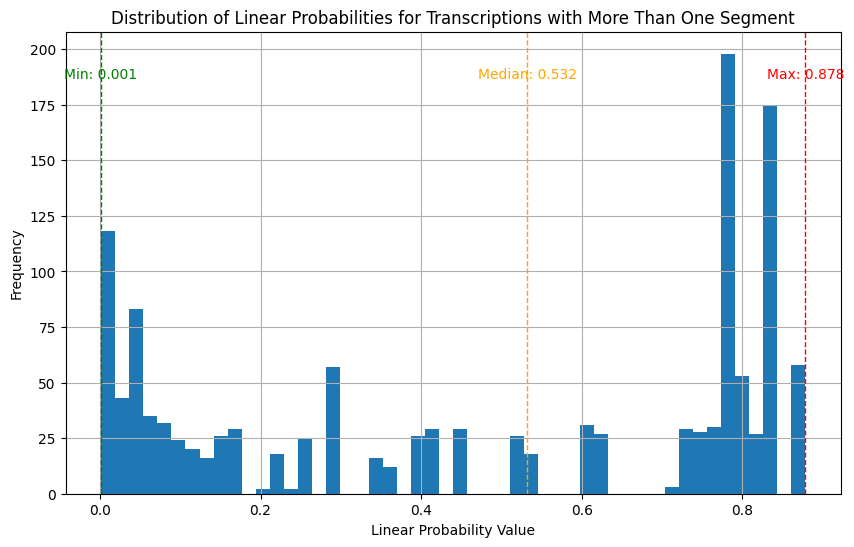

Histogram saved as ../graph/probabilities_distribution.png


In [23]:
# Function to collect all human-readable probabilities for transcriptions with more than one segment
def collect_probabilities(json_file_paths):
    all_probabilities = []

    for json_file_path in json_file_paths:
        data = load_json(json_file_path)

        for key, value in data.items():
            segments = value["segments"]

            # Only collect probabilities for transcriptions with more than one segment
            if len(segments) > 1:
                for segment in segments:
                    avg_logprob = segment["avg_logprob"]
                    probability = math.exp(avg_logprob)
                    all_probabilities.append(probability)

    return all_probabilities


# Collect all probabilities
all_probabilities = collect_probabilities(json_file_paths)

# # Calculate statistics
# min_prob = min(all_probabilities)
# max_prob = max(all_probabilities)
# median_prob = np.median(all_probabilities)

# # Print out some basic statistics about the probabilities
# print(f"Total number of probabilities collected: {len(all_probabilities)}")
# print(f"Minimum probability: {min_prob:.3f}")
# print(f"Maximum probability: {max_prob:.3f}")
# print(f"Median probability: {median_prob:.3f}")
# print(f"Average probability: {sum(all_probabilities) / len(all_probabilities):.3f}")

# Calculate statistics
min_prob = min(all_probabilities)
max_prob = max(all_probabilities)
median_prob = np.median(all_probabilities)
average_prob = sum(all_probabilities) / len(all_probabilities)

# Count the number of probabilities above 0.5
threshold = 0.5
count_above_threshold = sum(prob > threshold for prob in all_probabilities)
percentage_above_threshold = (count_above_threshold / len(all_probabilities)) * 100

# Print out some basic statistics about the probabilities
print(f"Total number of probabilities collected: {len(all_probabilities)}")
print(f"Minimum probability: {min_prob:.3f}")
print(f"Maximum probability: {max_prob:.3f}")
print(f"Median probability: {median_prob:.3f}")
print(f"Average probability: {average_prob:.3f}")
print(f"Number of probabilities above {threshold}: {count_above_threshold}")
print(f"Percentage of probabilities above {threshold}: {percentage_above_threshold:.2f}%")

# -------------------------------------------------------------------
# # Plotting a histogram of the probabilities to help decide the threshold
# plt.figure(figsize=(10, 6))
# plt.hist(all_probabilities, bins=50, color='blue', alpha=0.7)

# # Annotate minimum, maximum, and median values on the histogram
# plt.axvline(min_prob, color='red', linestyle='dashed', linewidth=1)
# plt.axvline(max_prob, color='green', linestyle='dashed', linewidth=1)
# plt.axvline(median_prob, color='orange', linestyle='dashed', linewidth=1)

# # Add text annotations for these values
# plt.text(min_prob, plt.ylim()[1]*0.9, f'Min: {min_prob:.3f}', color='red', ha='center')
# plt.text(max_prob, plt.ylim()[1]*0.9, f'Max: {max_prob:.3f}', color='green', ha='center')
# plt.text(median_prob, plt.ylim()[1]*0.9, f'Median: {median_prob:.3f}', color='orange', ha='center')

# # Titles and labels
# plt.title("Distribution of Probabilities for Transcriptions with More Than One Segment")
# plt.xlabel("Linear Probability")
# plt.ylabel("Frequency")
# plt.grid(True)

# # Save the plot as an image file
# output_image_path = "../graph/probabilities_distribution.png"
# plt.savefig(output_image_path)

# # Show the plot
# plt.show()

# print(f"Histogram saved as {output_image_path}")
# -------------------------------------------------------------------

# -------------------------------------------------------------------
# Plotting with enhanced academic style
plt.figure(figsize=(10, 6))

# Histogram with adjusted color and transparency
plt.hist(all_probabilities, bins=50, color='#1f77b4', alpha=1)

# Annotate statistical values with dashed lines and text
plt.axvline(min_prob, color='green', linestyle='dashed', linewidth=1)
plt.axvline(max_prob, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median_prob, color='orange', linestyle='dashed', linewidth=1)
plt.text(min_prob, plt.ylim()[1]*0.9, f'Min: {min_prob:.3f}', color='green', ha='center')
plt.text(max_prob, plt.ylim()[1]*0.9, f'Max: {max_prob:.3f}', color='red', ha='center')
plt.text(median_prob, plt.ylim()[1]*0.9, f'Median: {median_prob:.3f}', color='orange', ha='center')

# Titles and labels
plt.title("Distribution of Linear Probabilities for Transcriptions with More Than One Segment")
plt.xlabel("Linear Probability Value")
plt.ylabel("Frequency")
plt.grid(True)

# Save and display the plot
output_image_path = "../graph/probabilities_distribution.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  # Save with higher resolution and tight bounding box
plt.show()

print(f"Histogram saved as {output_image_path}")
# -------------------------------------------------------------------



## Process the raw tanscription

In [9]:
# Preprocesses the text by removing leading spaces and punctuations, and converting to lowercase.
def preprocess_text(text):
    text = text.strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

# Convert numbers to words if necessary
def convert_number_to_word(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.isdigit():
            converted_word = num2words(int(word))  # Convert number to word
            converted_words.append(converted_word)
        else:
            converted_words.append(word)
    return ' '.join(converted_words)

# Function to retrieve phonetic representations from CMU Pronouncing Dictionary.
def get_phonetic_representation(word):
    phonetic_representations = cmu_dict.get(word.lower())
    if phonetic_representations:
        return ' '.join(phonetic_representations[0])  # Join the phonetic representations with space
    else:
        return 'N/A'  # Return 'N/A' if word not found in dictionary

# Preprocesses the segment texts and calculates the confidence score for each transcription -- modified version
def preprocess_and_calculate(json_file_path):
    data = load_json(json_file_path)

    preprocessed_results = {}

    for key, value in data.items():
        studentID = value["studentID"]
        word = value["word"]
        trueLabel = value["trueLabel"]
        segments = value["segments"]

        # Preprocess text
        preprocessed_texts = []

        if len(segments) > 1:
            # Process all segments and set confidence score to 0
            for segment in segments:
                text = segment["text"]
                
                preprocessed_text = preprocess_text(text)
                preprocessed_texts.append(preprocessed_text)

            confidence_score = 0  # Set confidence score to 0 for multiple segments

        elif len(segments) == 1:
            # Only one segment: convert avg_logprob to human-readable probability
            avg_logprob = segments[0]["avg_logprob"]
            confidence_score = round(math.exp(avg_logprob), 3)

            text = segments[0]["text"]
            preprocessed_text = preprocess_text(text)
            preprocessed_texts.append(preprocessed_text)
        
        else:
            # Handle cases where there are no segments
            confidence_score = 0
            preprocessed_texts.append('')
            print(f"No transcriptions for audio file: {studentID}_{word}")

        # Join and process text for all cases
        whisper_transcription = ' '.join(preprocessed_texts).strip()
        whisper_transcription = convert_number_to_word(whisper_transcription)  # Convert numbers to words if necessary
        whisper_judge = 'intelligible' if whisper_transcription == word else 'unintelligible'
        temperature = segments[0]["temperature"] if segments else 0

        # Convert true transcription to words if necessary
        true_transcription_stripped = convert_number_to_word(word)

        # Get phonetic representations for both true and whisper's transcriptions
        true_phonetic_rep = get_phonetic_representation(true_transcription_stripped)
        whisper_phonetic_rep = get_phonetic_representation(whisper_transcription)

        # Determine whisper_judge_phonetic
        whisper_judge_phonetic = 'intelligible' if whisper_phonetic_rep == true_phonetic_rep else 'unintelligible'

        preprocessed_results[key] = {
            "studentID": studentID,
            "true_transcription": word,
            "trueLabel": trueLabel,
            "whisper_transcription": whisper_transcription,
            "whisper_judge": whisper_judge,
            "true_phonetic_rep": true_phonetic_rep,
            "whisper_phonetic_rep": whisper_phonetic_rep,
            "whisper_judge_phonetic": whisper_judge_phonetic,
            "confidence_score": confidence_score,
            "temperature": temperature
        }

    return preprocessed_results



# Save preprocessed results to a new JSON file
def save_preprocessed_results(preprocessed_results, output_json_file_path):
    with open(output_json_file_path, 'w') as json_file:
        json.dump(preprocessed_results, json_file, indent=4)
    print(f"Preprocessed results saved to {output_json_file_path}")

# Main function to preprocess and save the JSON data
def main_output_batch_preprocess(input_json_file_paths, output_json_file_paths):
    for input_path, output_path in zip(input_json_file_paths, output_json_file_paths):
        preprocessed_results = preprocess_and_calculate(input_path)
        save_preprocessed_results(preprocessed_results, output_path)

In [6]:
all_info_paths = [
    "../json_files/transcription_output/raw_tanscription_info/raw_info.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_00.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_01.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_02.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_03.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_04.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_05.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_06.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_07.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_08.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_09.json",
    "../json_files/transcription_output/raw_tanscription_info/raw_info_10.json"
]

In [7]:
processed_output_paths = ["../json_files/transcription_output/processed_output/output.json",
                          "../json_files/transcription_output/processed_output/output00.json",
                          "../json_files/transcription_output/processed_output/output01.json",
                          "../json_files/transcription_output/processed_output/output02.json",
                          "../json_files/transcription_output/processed_output/output03.json",
                          "../json_files/transcription_output/processed_output/output04.json",
                          "../json_files/transcription_output/processed_output/output05.json",
                          "../json_files/transcription_output/processed_output/output06.json",
                          "../json_files/transcription_output/processed_output/output07.json",
                          "../json_files/transcription_output/processed_output/output08.json",
                          "../json_files/transcription_output/processed_output/output09.json",
                          "../json_files/transcription_output/processed_output/output10.json"
                         ]

In [14]:
# Call function main_output_batch_preprocess to process the raw transcription and get the output json file
main_output_batch_preprocess(all_info_paths, processed_output_paths)

No transcriptions for audio file: s03_put
Preprocessed results saved to ../json_files/transcription_output/processed_output/output.json
No transcriptions for audio file: s03_put
Preprocessed results saved to ../json_files/transcription_output/processed_output/output00.json
No transcriptions for audio file: s03_put
Preprocessed results saved to ../json_files/transcription_output/processed_output/output01.json
Preprocessed results saved to ../json_files/transcription_output/processed_output/output02.json
No transcriptions for audio file: s03_put
Preprocessed results saved to ../json_files/transcription_output/processed_output/output03.json
No transcriptions for audio file: s03_put
Preprocessed results saved to ../json_files/transcription_output/processed_output/output04.json
Preprocessed results saved to ../json_files/transcription_output/processed_output/output05.json
No transcriptions for audio file: s03_pit
No transcriptions for audio file: s10_pole
Preprocessed results saved to ../js

## Count the number and percentage of "N/A"s(cmudict do not have the phonetic representations for some words) 

In [13]:
def count_words_no_phonetic_rep(file_path):
    # Step 1: Open and read the JSON file
    with open(file_path, 'r') as file:
        # Step 2: Parse the JSON data
        parsed_data = json.load(file)

    # Initialize counters and lists for tracking elements
    na_count = 0
    more_than_two_words_count = 0
    na_elements = {}
    more_than_two_words_elements = {}
    total_elements = len(parsed_data)

    # Iterate through each element in the JSON data
    for key, element in parsed_data.items():
        # Check for "N/A" in the "whisper_phonetic_rep" key
        if element["whisper_phonetic_rep"] == "N/A":
            na_count += 1
            # Store the key-value pair with whisper_transcription
            na_elements[key] = element["whisper_transcription"]

        # Check if "whisper_transcription" contains more than two words
        if len(element["whisper_transcription"].split()) >= 2:
            more_than_two_words_count += 1
            # Store the key-value pair with whisper_transcription
            more_than_two_words_elements[key] = element["whisper_transcription"]
            
    words_no_phonetic_rep = na_count - more_than_two_words_count
    # Calculate the percentage of "N/A"s
    words_no_phonetic_rep_percentage = (words_no_phonetic_rep / total_elements) * 100 if total_elements > 0 else 0

    # Determine elements that are in na_elements but not in more_than_two_words_elements
    words_no_phonetic_rep_elements = {}
    for key in na_elements:
        if key not in more_than_two_words_elements:
            words_no_phonetic_rep_elements[key] = na_elements[key]

    # Collect the results in a dictionary
    results = {
        "total_elements": total_elements,        
        "na_count": na_count,
        "na_elements": na_elements,
        "more_than_two_words_count": more_than_two_words_count,
        "more_than_two_words_elements": more_than_two_words_elements,
        "words_no_phonetic_rep": words_no_phonetic_rep,
        "words_no_phonetic_rep_elements": words_no_phonetic_rep_elements,
        "words_no_phonetic_rep_percentage": round(words_no_phonetic_rep_percentage, 3)
    }

    return results

def batch_count_na(file_paths, output_file):
    all_results = {}

    for file_path in file_paths:
        # Extract the base file name without extension
        file_name = os.path.splitext(os.path.basename(file_path))[0]
        # Process the file and get the results
        results = count_words_no_phonetic_rep(file_path)
        # Store the results in the dictionary with the file name as key
        all_results[file_name] = results
    

    # Save all results to a JSON file
    with open(output_file, 'w') as outfile:
        json.dump(all_results, outfile, indent=4)

In [16]:
output_file = "../json_files/NAs_info.json"
batch_count_na(processed_output_paths, output_file)

In [17]:
def read_summary_results(json_file):
    # Read the summary results JSON file
    with open(json_file, 'r') as file:
        summary_data = json.load(file)

    # Initialize a list to store element names and their percentages
    percentage_list = []

    # Iterate over each element in the summary data
    for key, data in summary_data.items():
        element_name = key
        words_no_phonetic_rep_percentage = data['words_no_phonetic_rep_percentage']
        percentage_list.append({
            'element_name': element_name,
            'words_no_phonetic_rep_percentage': words_no_phonetic_rep_percentage
        })

    return percentage_list

In [18]:
percentage_list = read_summary_results(output_file)

# Print the inspection list
print("Temperature value and the percentage of transcriptions generated by Whisper that do not have phonetic representation in cmudict:")
for item in percentage_list:
    print(f"{item['element_name']}, {item['words_no_phonetic_rep_percentage']:.3f} %")

Temperature value and the percentage of transcriptions generated by Whisper that do not have phonetic representation in cmudict:
output, 3.682 %
output00, 3.682 %
output01, 3.682 %
output02, 4.070 %
output03, 2.907 %
output04, 3.101 %
output05, 3.876 %
output06, 5.620 %
output07, 6.395 %
output08, 5.620 %
output09, 5.620 %
output10, 7.171 %


# Evaluation Metrics

**True Positive (TP)**: Whisper correctly transcribes an intelligible word (matches gold label "intelligible").
`Whisper:intelligible`, `gold:intelligible`

**True Negative (TN)**: Whisper incorrectly transcribes an unintelligible word (matches gold label "unintelligible").
`Whisper:unintelligible`, `gold:unintelligible`

**False Positive (FP)**: Whisper correctly transcribes an unintelligible word (mismatch with gold label "unintelligible").
`Whisper:intelligible`, `gold:unintelligible`

**False Negative (FN)**: Whisper incorrectly transcribes an intelligible word (mismatch with gold label "intelligible").
`Whisper:unintelligible`, `gold:intelligible`


## Save the metrics as JSON files

In [16]:
# Extract true labels and predicted labels
def extract_labels(data):
    true_labels = []
    whisper_judges = []
    whisper_judges_phonetic = []

    for key, value in data.items():
        true_labels.append(value["trueLabel"])
        whisper_judges.append(value["whisper_judge"])
        whisper_judges_phonetic.append(value["whisper_judge_phonetic"])

    # Convert 'intelligible'/'unintelligible' to binary labels (1 for 'intelligible', 0 for 'unintelligible')
    true_labels = [1 if label == "intelligible" else 0 for label in true_labels]
    whisper_judges = [1 if judge == "intelligible" else 0 for judge in whisper_judges]
    whisper_judges_phonetic = [1 if judge == "intelligible" else 0 for judge in whisper_judges_phonetic]

    return true_labels, whisper_judges, whisper_judges_phonetic


# Calculate evaluation metrics
def calculate_metrics(true_labels, predicted_labels):
    precision_intelligible = precision_score(true_labels, predicted_labels, pos_label=1)
    recall_intelligible = recall_score(true_labels, predicted_labels, pos_label=1)
    f1_intelligible = f1_score(true_labels, predicted_labels, pos_label=1)
    f05_intelligible = fbeta_score(true_labels, predicted_labels, beta=0.5, pos_label=1)

    precision_unintelligible = precision_score(true_labels, predicted_labels, pos_label=0)
    recall_unintelligible = recall_score(true_labels, predicted_labels, pos_label=0)
    f1_unintelligible = f1_score(true_labels, predicted_labels, pos_label=0)
    f05_unintelligible = fbeta_score(true_labels, predicted_labels, beta=0.5, pos_label=0)

    return {
        "precision_intelligible": precision_intelligible,
        "recall_intelligible": recall_intelligible,
        "f1_intelligible": f1_intelligible,
        "f0.5_intelligible": f05_intelligible,
        "precision_unintelligible": precision_unintelligible,
        "recall_unintelligible": recall_unintelligible,
        "f1_unintelligible": f1_unintelligible,
        "f0.5_unintelligible": f05_unintelligible,
    }


# Print confusion matrix with labels
def print_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix:")
    print("               Predicted Unintelligible     Predicted Intelligible")
    print(f"Actual Unintelligible        {cm[0][0]:<15} {cm[0][1]:<15}")
    print(f"Actual Intelligible          {cm[1][0]:<15} {cm[1][1]:<15}")


def save_metrics_structured(metrics, json_file_path):
    formatted_metrics = {
        "class intelligible": {
            "whisper_judge": {
                "precision_intelligible": round(metrics["whisper_judge"]["precision_intelligible"], 3),
                "recall_intelligible": round(metrics["whisper_judge"]["recall_intelligible"], 3),
                "f1_intelligible": round(metrics["whisper_judge"]["f1_intelligible"], 3),
                "f0.5_intelligible": round(metrics["whisper_judge"]["f0.5_intelligible"], 3),
            },
            "whisper_judge_phonetic": {
                "precision_intelligible": round(metrics["whisper_judge_phonetic"]["precision_intelligible"], 3),
                "recall_intelligible": round(metrics["whisper_judge_phonetic"]["recall_intelligible"], 3),
                "f1_intelligible": round(metrics["whisper_judge_phonetic"]["f1_intelligible"], 3),
                "f0.5_intelligible": round(metrics["whisper_judge_phonetic"]["f0.5_intelligible"], 3),
            },
        },
        "class unintelligible": {
            "whisper_judge": {
                "precision_unintelligible": round(metrics["whisper_judge"]["precision_unintelligible"], 3),
                "recall_unintelligible": round(metrics["whisper_judge"]["recall_unintelligible"], 3),
                "f1_unintelligible": round(metrics["whisper_judge"]["f1_unintelligible"], 3),
                "f0.5_unintelligible": round(metrics["whisper_judge"]["f0.5_unintelligible"], 3),
            },
            "whisper_judge_phonetic": {
                "precision_unintelligible": round(metrics["whisper_judge_phonetic"]["precision_unintelligible"], 3),
                "recall_unintelligible": round(metrics["whisper_judge_phonetic"]["recall_unintelligible"], 3),
                "f1_unintelligible": round(metrics["whisper_judge_phonetic"]["f1_unintelligible"], 3),
                "f0.5_unintelligible": round(metrics["whisper_judge_phonetic"]["f0.5_unintelligible"], 3),
            },
        }
    }
    with open(json_file_path, 'w') as json_file:
        json.dump(formatted_metrics, json_file, indent=4)
    print(f"Metrics saved to {json_file_path}")

## Visualize the results

In [17]:
# Function to plot and save confusion matrix with academic styling
def plot_confusion_matrix(cm, labels, title, file_path):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    # Use a more academic color palette
    # cmap = sns.diverging_palette(220, 20, as_cmap=True)    # bule to red
    # cmap = sns.color_palette("crest", as_cmap=True)    # green to blue
    cmap = sns.color_palette("Blues", as_cmap=True)    # white to blue
    

    # Plot heatmap
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=True,
                     xticklabels=labels, yticklabels=labels,
                     linewidths=.5, linecolor='black', annot_kws={"size": 14})
    
    # Add labels and title with academic styling
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_xlabel('Predicted Labels', fontsize=14)  # Corrected label
    ax.set_ylabel('True Labels', fontsize=14)       # Corrected label
    
    # Adjust the tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)
    
    # Add color bar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    
    # Save the plot with tight layout
    plt.tight_layout()
    plt.savefig(file_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()


# main_metrics function (to load the preprocessed json file, calculate the metrics, print out and save to a json file)
def main_metrics(preprocessed_json_file_paths, metrics_json_file_paths, confusion_matrix_paths):
    for preprocessed_json_file_path, metrics_json_file_path, confusion_matrix_path in zip(preprocessed_json_file_paths, metrics_json_file_paths, confusion_matrix_paths):  
        data = load_json(preprocessed_json_file_path)  # Load the preprocessed JSON file
        true_labels, whisper_judges, whisper_judges_phonetic = extract_labels(data)
    
        print("Evaluation metrics for whisper_judge (text-based):")
        metrics_whisper_judge = calculate_metrics(true_labels, whisper_judges)
        for metric, value in metrics_whisper_judge.items():
            print(f"{metric}: {value:.3f}")
        print("-"*46)
        print_confusion_matrix(true_labels, whisper_judges)
        print("-"*61)
    
        print("Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):")
        metrics_whisper_judge_phonetic = calculate_metrics(true_labels, whisper_judges_phonetic)
        for metric, value in metrics_whisper_judge_phonetic.items():
            print(f"{metric}: {value:.3f}")
        print("-"*46)
        print_confusion_matrix(true_labels, whisper_judges_phonetic)
        
        # Save metrics to JSON file
        metrics = {
            "whisper_judge": metrics_whisper_judge,
            "whisper_judge_phonetic": metrics_whisper_judge_phonetic
        }
        save_metrics_structured(metrics, metrics_json_file_path)
        
        print("\n" + "="*70 + "\n")

        # Plot and save confusion matrices with actual counts
        cm_text = confusion_matrix(true_labels, whisper_judges)
        # plot_confusion_matrix(cm_text, ['No', 'Yes'], 'Confusion Matrix - Whisper Judge', confusion_matrix_path + '_text.png')
        plot_confusion_matrix(cm_text, ['Unintelligible', 'Intelligible'], 'Confusion Matrix for Comparing Text', confusion_matrix_path + '_text.png')

        cm_phonetic = confusion_matrix(true_labels, whisper_judges_phonetic)
        # plot_confusion_matrix(cm_phonetic, ['No', 'Yes'], 'Confusion Matrix - Whisper Judge Phonetic', confusion_matrix_path + '_phonetic.png')
        plot_confusion_matrix(cm_phonetic, ['Unintelligible', 'Intelligible'], 'Confusion Matrix for Comparing Phonetic Representation', confusion_matrix_path + '_phonetic.png')


In [5]:
metrics_paths_no_confidence_threshold = ["../json_files/metrics_output/no_confidence_threshold/metrics.json",
                "../json_files/metrics_output/no_confidence_threshold/metrics00.json",
                "../json_files/metrics_output/no_confidence_threshold/metrics01.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics02.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics03.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics04.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics05.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics06.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics07.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics08.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics09.json",
                 "../json_files/metrics_output/no_confidence_threshold/metrics10.json"
                ]

In [8]:
# Example usage
confusion_matrix_no_confidence_threshold_paths = ['../confusion_matrix/no_confidence_threshold/cm', 
                          '../confusion_matrix/no_confidence_threshold/cm00', 
                          '../confusion_matrix/no_confidence_threshold/cm01', 
                          '../confusion_matrix/no_confidence_threshold/cm02',
                          '../confusion_matrix/no_confidence_threshold/cm03',
                          '../confusion_matrix/no_confidence_threshold/cm04',
                          '../confusion_matrix/no_confidence_threshold/cm05',
                          '../confusion_matrix/no_confidence_threshold/cm06',
                          '../confusion_matrix/no_confidence_threshold/cm07',
                          '../confusion_matrix/no_confidence_threshold/cm08',
                          '../confusion_matrix/no_confidence_threshold/cm09',
                          '../confusion_matrix/no_confidence_threshold/cm10'
                         ]

main_metrics(processed_output_paths, metrics_paths_no_confidence_threshold, confusion_matrix_no_confidence_threshold_paths)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.875
recall_intelligible: 0.218
f1_intelligible: 0.349
f0.5_intelligible: 0.546
precision_unintelligible: 0.355
recall_unintelligible: 0.933
f1_unintelligible: 0.514
f0.5_unintelligible: 0.405
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        152             11             
Actual Intelligible          276             77             
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.889
recall_intelligible: 0.340
f1_intelligible: 0.492
f0.5_intelligible: 0.672
precision_unintelligible: 0.388
recall_unintelligible: 0.908
f1_unintelligible: 0.544
f0.5_unintelligible: 0.439
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

# Find the highest F05 score 

In [10]:
def find_max_f05_scores(metrics_json_paths, temperature_values):
    max_scores = {
        "intelligible": {"score": -float('inf'), "temperatures": []},
        "unintelligible": {"score": -float('inf'), "temperatures": []}
    }

    for i, file_path in enumerate(metrics_json_paths):
        temperature = temperature_values[i]

        with open(file_path, 'r') as file:
            parsed_data = json.load(file)

        f05_intelligible = parsed_data["class intelligible"]["whisper_judge_phonetic"]["f0.5_intelligible"]
        f05_unintelligible = parsed_data["class unintelligible"]["whisper_judge_phonetic"]["f0.5_unintelligible"]

        if f05_intelligible > max_scores["intelligible"]["score"]:
            max_scores["intelligible"]["score"] = f05_intelligible
            max_scores["intelligible"]["temperatures"] = [temperature]
        elif f05_intelligible == max_scores["intelligible"]["score"]:
            max_scores["intelligible"]["temperatures"].append(temperature)

        if f05_unintelligible > max_scores["unintelligible"]["score"]:
            max_scores["unintelligible"]["score"] = f05_unintelligible
            max_scores["unintelligible"]["temperatures"] = [temperature]
        elif f05_unintelligible == max_scores["unintelligible"]["score"]:
            max_scores["unintelligible"]["temperatures"].append(temperature)

    return max_scores

In [11]:
temp_values = [None, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

max_scores = find_max_f05_scores(metrics_paths_no_confidence_threshold, temp_values)

print("Maximum F0.5 scores:")
print(f"For class 'intelligible': Score = {max_scores['intelligible']['score']}, Temperatures = {max_scores['intelligible']['temperatures']}")
print(f"For class 'unintelligible': Score = {max_scores['unintelligible']['score']}, Temperatures = {max_scores['unintelligible']['temperatures']}")


Maximum F0.5 scores:
For class 'intelligible': Score = 0.699, Temperatures = [0.1]
For class 'unintelligible': Score = 0.45, Temperatures = [0.1]


In [12]:
def extract_f05_scores(metrics_json_paths, temp_values):
    f05_scores_intelligible = []
    f05_scores_unintelligible = []

    # Iterate through each JSON file
    for i, file_path in enumerate(metrics_json_paths):
        temperature = temp_values[i]

        # Open and parse JSON
        with open(file_path, 'r') as file:
            parsed_data = json.load(file)

        # Extract F0.5 scores for "intelligible" and "unintelligible"
        f05_intelligible = parsed_data["class intelligible"]["whisper_judge_phonetic"]["f0.5_intelligible"]
        f05_unintelligible = parsed_data["class unintelligible"]["whisper_judge_phonetic"]["f0.5_unintelligible"]

        # Append scores to lists
        f05_scores_intelligible.append((f05_intelligible, temperature))
        f05_scores_unintelligible.append((f05_unintelligible, temperature))

    return f05_scores_intelligible, f05_scores_unintelligible

In [13]:
f05_scores_intelligible, f05_scores_unintelligible = extract_f05_scores(metrics_paths_no_confidence_threshold, temp_values)

In [14]:
# Print the lists
print("F0.5 Scores for class 'intelligible':")
for score, temp in f05_scores_intelligible:
    print(f"Score: {score}, Temperature: {temp}")

print("\nF0.5 Scores for class 'unintelligible':")
for score, temp in f05_scores_unintelligible:
    print(f"Score: {score}, Temperature: {temp}")

F0.5 Scores for class 'intelligible':
Score: 0.672, Temperature: None
Score: 0.696, Temperature: 0
Score: 0.699, Temperature: 0.1
Score: 0.695, Temperature: 0.2
Score: 0.678, Temperature: 0.3
Score: 0.697, Temperature: 0.4
Score: 0.652, Temperature: 0.5
Score: 0.671, Temperature: 0.6
Score: 0.655, Temperature: 0.7
Score: 0.661, Temperature: 0.8
Score: 0.615, Temperature: 0.9
Score: 0.608, Temperature: 1

F0.5 Scores for class 'unintelligible':
Score: 0.439, Temperature: None
Score: 0.448, Temperature: 0
Score: 0.45, Temperature: 0.1
Score: 0.449, Temperature: 0.2
Score: 0.439, Temperature: 0.3
Score: 0.449, Temperature: 0.4
Score: 0.429, Temperature: 0.5
Score: 0.437, Temperature: 0.6
Score: 0.43, Temperature: 0.7
Score: 0.433, Temperature: 0.8
Score: 0.421, Temperature: 0.9
Score: 0.422, Temperature: 1


In [20]:
# Print the lists
print("F0.5 Scores for class 'intelligible':")
for score, temp in f05_scores_intelligible:
    print(f"Score: {score}, Temperature: {temp}")

print("\nF0.5 Scores for class 'unintelligible':")
for score, temp in f05_scores_unintelligible:
    print(f"Score: {score}, Temperature: {temp}")

F0.5 Scores for 'yes' class:
Score: 0.669, Temperature: None
Score: 0.696, Temperature: 0
Score: 0.697, Temperature: 0.1
Score: 0.689, Temperature: 0.2
Score: 0.684, Temperature: 0.3
Score: 0.697, Temperature: 0.4
Score: 0.661, Temperature: 0.5
Score: 0.661, Temperature: 0.6
Score: 0.648, Temperature: 0.7
Score: 0.633, Temperature: 0.8
Score: 0.598, Temperature: 0.9
Score: 0.573, Temperature: 1

F0.5 Scores for 'no' class:
Score: 0.436, Temperature: None
Score: 0.448, Temperature: 0
Score: 0.449, Temperature: 0.1
Score: 0.445, Temperature: 0.2
Score: 0.442, Temperature: 0.3
Score: 0.45, Temperature: 0.4
Score: 0.434, Temperature: 0.5
Score: 0.435, Temperature: 0.6
Score: 0.43, Temperature: 0.7
Score: 0.426, Temperature: 0.8
Score: 0.417, Temperature: 0.9
Score: 0.411, Temperature: 1


## Visualize the comparison results with different temperature

In [9]:
# Main function to load JSON, extract labels, and calculate metrics
def evaluate_file(json_file_path):
    data = load_json(json_file_path)
    true_labels, whisper_judges, whisper_judges_phonetic = extract_labels(data)

    metrics_whisper_judge = calculate_metrics(true_labels, whisper_judges)
    metrics_whisper_judge_phonetic = calculate_metrics(true_labels, whisper_judges_phonetic)

    return metrics_whisper_judge, metrics_whisper_judge_phonetic

In [13]:
# Function to plot comparison
def plot_comparison(file_paths):
    # temperature_values_for_plotting = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]  
    # # add 1.1 for plotting metrics, since 0.0-1.0 are for specified temperature values, and the default temperature does not have a numerical number use 1.1 at the end for plotting

    temperature_values_for_plotting = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  
    
    metrics_data = []

    for temp, file_path in zip(temperature_values_for_plotting, file_paths):
        metrics_whisper_judge, metrics_whisper_judge_phonetic = evaluate_file(file_path)
        for metric, value in metrics_whisper_judge.items():
            metrics_data.append({
                "Temperature": temp,
                "Metric": metric,
                "Value": value,
                "Type": "whisper_judge"
            })
        for metric, value in metrics_whisper_judge_phonetic.items():
            metrics_data.append({
                "Temperature": temp,
                "Metric": metric,
                "Value": value,
                "Type": "whisper_judge_phonetic"
            })

    df = pd.DataFrame(metrics_data)
    
    # Plotting the metrics
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x="Temperature", y="Value", hue="Metric", style="Type", markers=True)
    plt.title("Comparison of Metrics Across Different Temperatures for Both Classes", fontweight='bold')
    plt.xlabel("Temperature")
    plt.ylabel("Metric Value")
    plt.xticks(temperature_values_for_plotting)  # Explicitly set the X-axis ticks to show all temperature values
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.savefig("../graph/comparison_both_classes.png", bbox_inches='tight') # save the figure
    plt.show()

In [14]:
processed_output_paths_for_plotting = [
    "../json_files/transcription_output/processed_output/output00.json",
    "../json_files/transcription_output/processed_output/output01.json",
    "../json_files/transcription_output/processed_output/output02.json",
    "../json_files/transcription_output/processed_output/output03.json",
    "../json_files/transcription_output/processed_output/output04.json",
    "../json_files/transcription_output/processed_output/output05.json",
    "../json_files/transcription_output/processed_output/output06.json",
    "../json_files/transcription_output/processed_output/output07.json",
    "../json_files/transcription_output/processed_output/output08.json",
    "../json_files/transcription_output/processed_output/output09.json",
    "../json_files/transcription_output/processed_output/output10.json"
    # "../json_files/transcription_output/processed_output/output.json",
                         ]

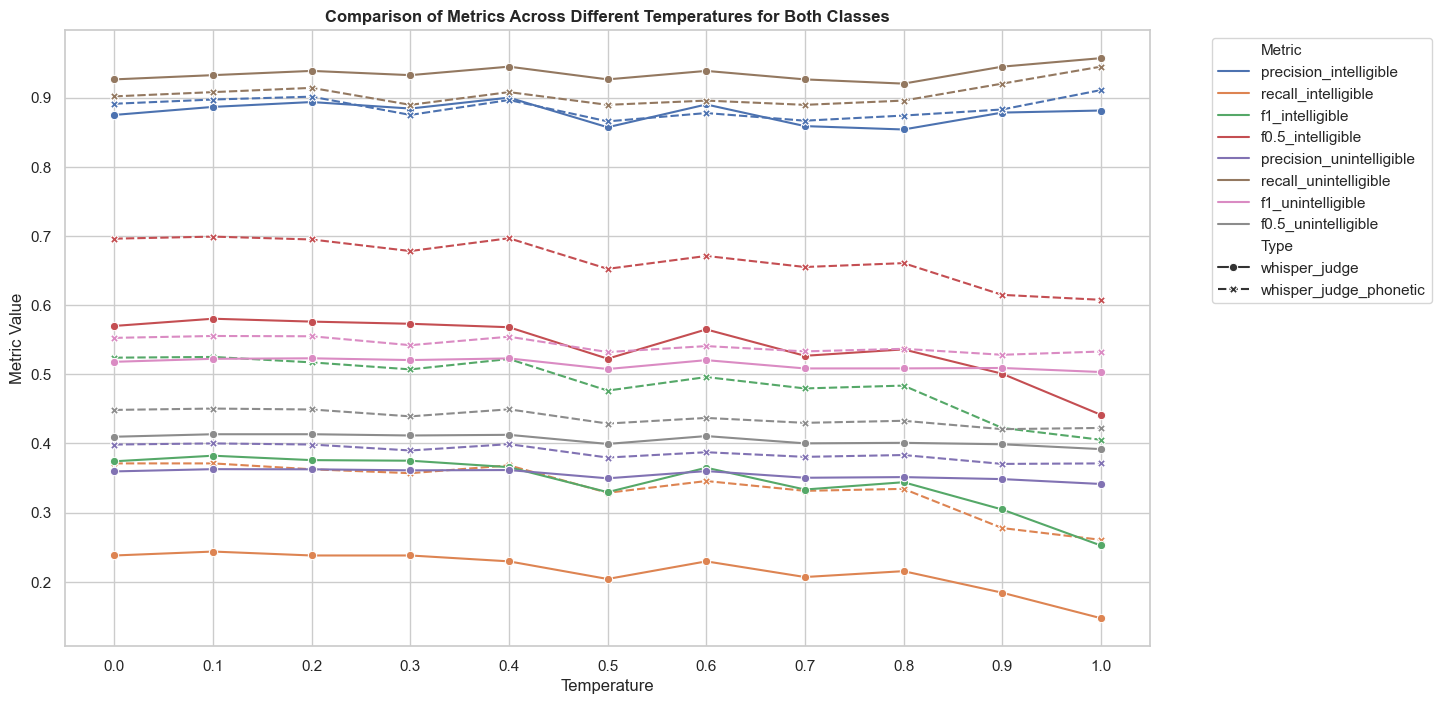

In [15]:
plot_comparison(processed_output_paths_for_plotting)

## plot the line chart for both classes 'intelligible' and unintelligible'

In [10]:
# Modified plotting function to show the highest values for each metric
def plot_comparison_with_highest_values(file_paths):
    # temperature_values_for_plotting = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]  
    # add 1.1 for plotting metrics, since 0.0-1.0 are for specified temperature values, and the default temperature does not have a numerical number use 1.1 at the end for plotting

    temperature_values_for_plotting = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]     
    
    metrics_data_intelligible = []
    metrics_data_unintelligible = []

    for temp, file_path in zip(temperature_values_for_plotting, file_paths):
        metrics_whisper_judge, metrics_whisper_judge_phonetic = evaluate_file(file_path)
        for metric, value in metrics_whisper_judge.items():
            if "unintelligible" in metric:
                metrics_data_unintelligible.append({
                    "Temperature": temp,
                    "Metric": metric,
                    "Value": value,
                    "Type": "whisper_judge"
                })
            elif "intelligible" in metric:
                metrics_data_intelligible.append({
                    "Temperature": temp,
                    "Metric": metric,
                    "Value": value,
                    "Type": "whisper_judge"
                })
        
        for metric, value in metrics_whisper_judge_phonetic.items():
            if "unintelligible" in metric:
                metrics_data_unintelligible.append({
                    "Temperature": temp,
                    "Metric": metric,
                    "Value": value,
                    "Type": "whisper_judge_phonetic"
                })
            elif "intelligible" in metric:
                metrics_data_intelligible.append({
                    "Temperature": temp,
                    "Metric": metric,
                    "Value": value,
                    "Type": "whisper_judge_phonetic"
                })


    df_intelligible = pd.DataFrame(metrics_data_intelligible)
    df_unintelligible = pd.DataFrame(metrics_data_unintelligible)

    def highlight_max(data):
        if data.empty:
            return pd.Index([])  # Return an empty index if the DataFrame is empty
        grouped = data.groupby('Metric')['Value']
        max_idx = grouped.transform(max) == data['Value']
        return data[max_idx].index
        

    if not df_intelligible.empty:
        max_intelligible_indices = highlight_max(df_intelligible)
        
        # Plotting the metrics for class 'intelligible'
        plt.figure(figsize=(14, 8))
        sns.lineplot(data=df_intelligible, x="Temperature", y="Value", hue="Metric", style="Type", markers=True)
        
        # Highlight max values for class 'intelligible'
        for idx in max_intelligible_indices:
            max_value = df_intelligible.loc[idx]
            plt.text(max_value['Temperature'], max_value['Value'], f'{max_value["Value"]:.3f}', 
                     horizontalalignment='center', size='medium', color='black', weight='semibold')
        
        plt.title("Comparison of Results for Class 'Intelligible' Across Different Temperatures", fontweight='bold')
        plt.xlabel("Temperature")
        plt.ylabel("Metric Value")
        plt.xticks(temperature_values_for_plotting) # Explicitly set the X-axis ticks to show all temperature values
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.savefig("../graph/comparison_intelligible.png", bbox_inches='tight') # save the figure
        plt.show()
    else:
        print("No data available for 'intelligible' metrics to plot.")
        
    
    if not df_unintelligible.empty:
        max_unintelligible_indices = highlight_max(df_unintelligible)
        
        # Plotting the metrics for class 'unintelligible'
        plt.figure(figsize=(14, 8))
        sns.lineplot(data=df_unintelligible, x="Temperature", y="Value", hue="Metric", style="Type", markers=True)
        
        # Highlight max values for class 'unintelligible'
        for idx in max_unintelligible_indices:
            max_value = df_unintelligible.loc[idx]
            plt.text(max_value['Temperature'], max_value['Value'], f'{max_value["Value"]:.3f}', 
                     horizontalalignment='center', size='medium', color='black', weight='semibold')
        
        plt.title("Comparison of Results for Class 'Unintelligible' Across Different Temperatures", fontweight='bold')
        plt.xlabel("Temperature")
        plt.ylabel("Metric Value")
        plt.xticks(temperature_values_for_plotting) # Explicitly set the X-axis ticks to show all temperature values
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.savefig("../graph/comparison_unintelligible.png", bbox_inches='tight') # save the figure
        plt.show()
    else:
        print("No data available for 'unintelligible' metrics to plot.")


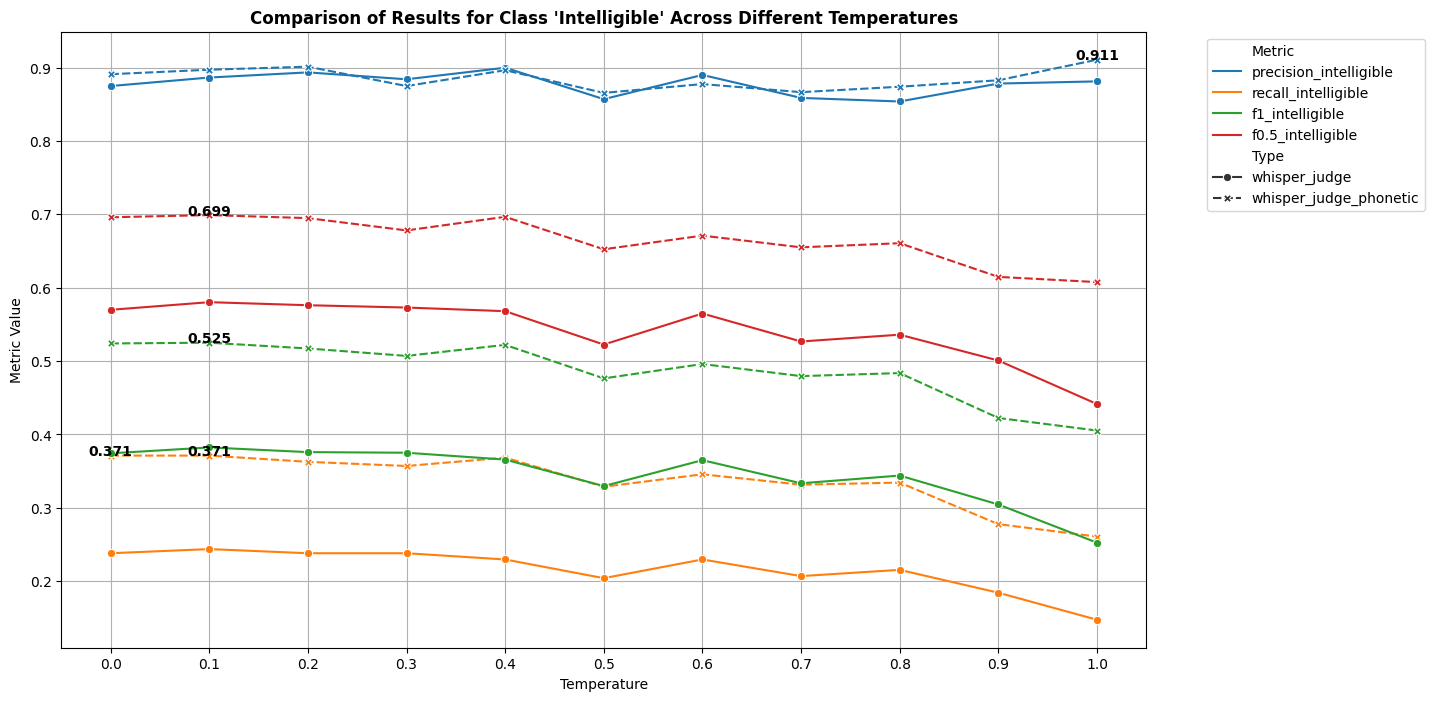

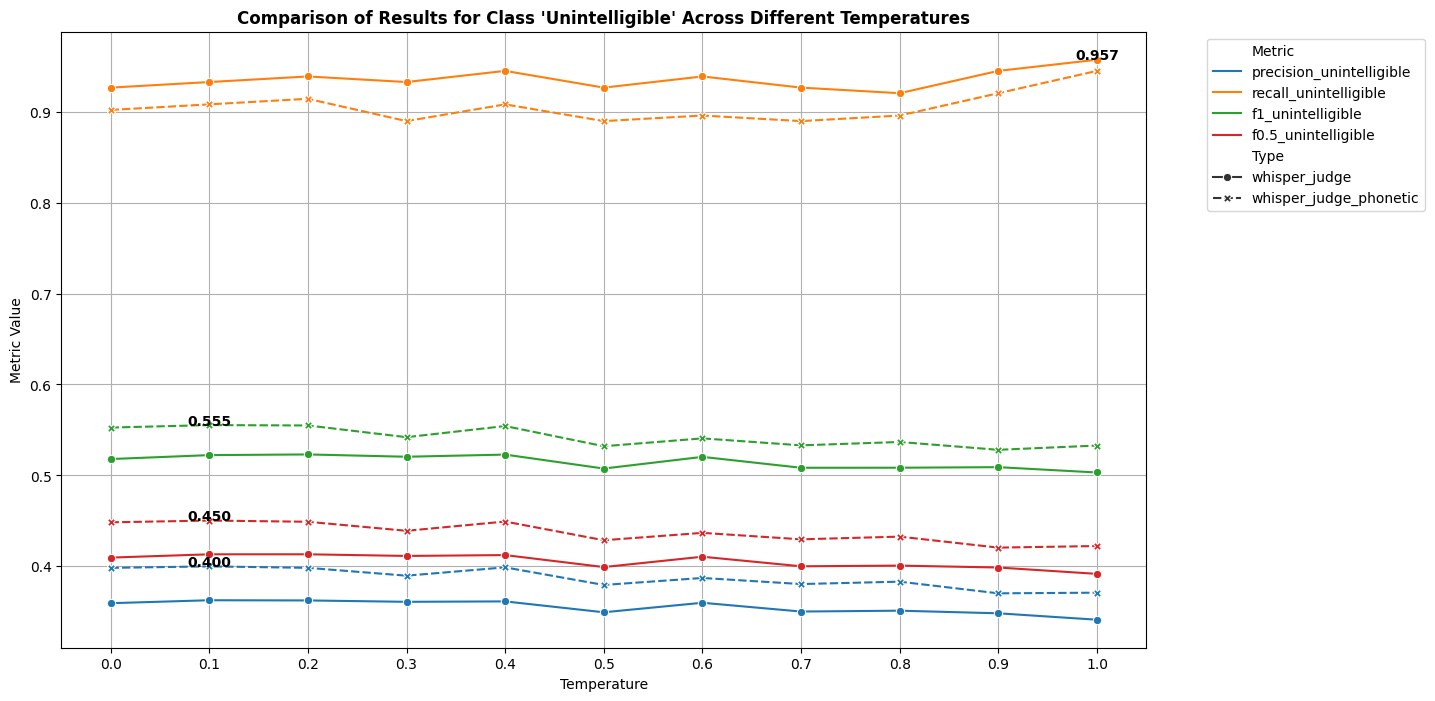

In [11]:
plot_comparison_with_highest_values(processed_output_paths_for_plotting)

Since the values of metrics' results (the saved JSON files) were rounded to to 3 decimal places, we found 2 values of temperature reached the highest F0.5 score. 

`Maximum F0.5 scores:`

`For class 'intelligible': Score = 0.697, Temperatures = [0.1, 0.4]`

`For class 'unintelligible': Score = 0.45, Temperatures = [0.4]`

However, when calling the function plot_comparison_with_highest_values, the highest F0.5 score 0.697 is shown only once when temperature = 0.4. This is because the function **calculate_metrics**(inside function **`evaluate_file`** that is called inside `plot_comparison_with_highest_values`) **gives the raw results** (e.g., 0.697124689). 


# Apply confidence score as the threshold 

and use it to decide whether to classify a transcription as correct (intelligible) or incorrect (unintelligible)

In [18]:
# Extract true labels and predicted labels with confidence threshold -- modified
def extract_labels_with_threshold(data, confidence_threshold):
    true_labels = []
    whisper_judges = []
    whisper_judges_phonetic = []

    for key, value in data.items():
        # Add true labels as they are (without conversion to binary)
        true_labels.append(value["trueLabel"])

        # Check if the confidence score is above the threshold
        if value["confidence_score"] >= confidence_threshold:
            whisper_judges.append(value["whisper_judge"])
            whisper_judges_phonetic.append(value["whisper_judge_phonetic"])
        else:
            # Automatically classify as 'intelligible' if below threshold
            whisper_judges.append("intelligible")
            whisper_judges_phonetic.append("intelligible")

    # Convert 'intelligible'/'unintelligible' to binary labels (1 for 'intelligible', 0 for 'unintelligible')
    true_labels = [1 if label == "intelligible" else 0 for label in true_labels]
    whisper_judges = [1 if judge == "intelligible" else 0 for judge in whisper_judges]
    whisper_judges_phonetic = [1 if judge == "intelligible" else 0 for judge in whisper_judges_phonetic]

    return true_labels, whisper_judges, whisper_judges_phonetic


### Example inspection

In [54]:
data = load_json("../json_files/transcription_output/processed_output/output00.json")

In [55]:
true_labels, whisper_judges, whisper_judges_phonetic = extract_labels_with_threshold(data, 0.8)

In [56]:
print(len(true_labels), len(whisper_judges), len(whisper_judges_phonetic))

516 516 516


In [57]:
true_labels[:20]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]

## Visualization

In [19]:
def plot_confusion_matrix_with_threshold(cm, labels, title, file_path, confidence_threshold):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    # Use a more academic color palette
    cmap = sns.color_palette("Blues", as_cmap=True)    # white to blue

    # Plot heatmap
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=True,
                     xticklabels=labels, yticklabels=labels,
                     linewidths=.5, linecolor='black', annot_kws={"size": 14})
    
    # Add labels and title with academic styling
    ax.set_title(f"{title}\nConfidence Threshold: {confidence_threshold}", fontsize=16, weight='bold', pad=10)
    # ------------------------------------- title style -------------------------------------
    # main_title = f"{title}"
    # subtitle = f"Confidence Threshold: {confidence_threshold}"
    # ax.set_title(f"{main_title}\n\n{subtitle}", fontsize=16, weight='bold')
    # ------------------------------------- title style -------------------------------------

    ax.set_xlabel('Predicted Labels', fontsize=14)
    ax.set_ylabel('True Labels', fontsize=14)
    
    # Adjust the tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)
    
    # Add color bar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    
    # Save the plot with tight layout
    plt.tight_layout()
    plt.savefig(file_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()


In [20]:
def main_metrics_with_threshold(preprocessed_json_file_paths, metrics_json_file_paths, confusion_matrix_paths, confidence_threshold):
    for preprocessed_json_file_path, metrics_json_file_path, confusion_matrix_path in zip(preprocessed_json_file_paths, metrics_json_file_paths, confusion_matrix_paths):
        data = load_json(preprocessed_json_file_path)  # Load the preprocessed JSON file
        
        # Use extract_labels_with_threshold with the confidence threshold
        true_labels, whisper_judges, whisper_judges_phonetic = extract_labels_with_threshold(data, confidence_threshold)
        
        print("Evaluation metrics for whisper_judge (text-based):")
        metrics_whisper_judge = calculate_metrics(true_labels, whisper_judges)
        for metric, value in metrics_whisper_judge.items():
            print(f"{metric}: {value:.3f}")
        print("-"*46)
        print_confusion_matrix(true_labels, whisper_judges)
        print("-"*61)
        
        print("Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):")
        metrics_whisper_judge_phonetic = calculate_metrics(true_labels, whisper_judges_phonetic)
        for metric, value in metrics_whisper_judge_phonetic.items():
            print(f"{metric}: {value:.3f}")
        print("-"*46)
        print_confusion_matrix(true_labels, whisper_judges_phonetic)
        
        # Save metrics to JSON file
        metrics = {
            "whisper_judge": metrics_whisper_judge,
            "whisper_judge_phonetic": metrics_whisper_judge_phonetic
        }
        save_metrics_structured(metrics, metrics_json_file_path)
        
        print("\n" + "="*70 + "\n")
        
        # Plot and save confusion matrices with actual counts
        cm_text = confusion_matrix(true_labels, whisper_judges)
        plot_confusion_matrix_with_threshold(cm_text, ['Unintelligible', 'Intelligible'], 'Confusion Matrix for Comparing Text', confusion_matrix_path + '_text.png', confidence_threshold)
        
        cm_phonetic = confusion_matrix(true_labels, whisper_judges_phonetic)
        plot_confusion_matrix_with_threshold(cm_phonetic, ['Unintelligible', 'Intelligible'], 'Confusion Matrix for Comparing Phonetic Representation', confusion_matrix_path + '_phonetic.png', confidence_threshold)


In [15]:
# old temperatures -- even numbers
# preprocessed_jsons = [
#     "../json_files/transcription_output/processed_output/output00.json",
#     "../json_files/transcription_output/processed_output/output02.json",
#     "../json_files/transcription_output/processed_output/output04.json",
#     "../json_files/transcription_output/processed_output/output06.json",
#     "../json_files/transcription_output/processed_output/output08.json",
#     "../json_files/transcription_output/processed_output/output10.json"] 

In [19]:
preprocessed_jsons = [
    "../json_files/transcription_output/processed_output/output01.json",
    "../json_files/transcription_output/processed_output/output03.json",
    "../json_files/transcription_output/processed_output/output05.json",
    "../json_files/transcription_output/processed_output/output07.json",
    "../json_files/transcription_output/processed_output/output09.json"] 

### confidence threshold = 0.3

In [22]:
confidence_T03 = 0.3

cs03_metrics_output = [
    "../json_files/metrics_output/metrics01_cs03.json",
    "../json_files/metrics_output/metrics03_cs03.json",
    "../json_files/metrics_output/metrics05_cs03.json",
    "../json_files/metrics_output/metrics07_cs03.json",
    "../json_files/metrics_output/metrics09_cs03.json"]

cs03_cm_output = [
    "../confusion_matrix/confidence_threshold_03/cm01_cs03",
    "../confusion_matrix/confidence_threshold_03/cm03_cs03",
    "../confusion_matrix/confidence_threshold_03/cm05_cs03",
    "../confusion_matrix/confidence_threshold_03/cm07_cs03",
    "../confusion_matrix/confidence_threshold_03/cm09_cs03"]

In [23]:
main_metrics_with_threshold(preprocessed_jsons, cs03_metrics_output, cs03_cm_output, confidence_T03)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.876
recall_intelligible: 0.340
f1_intelligible: 0.490
f0.5_intelligible: 0.666
precision_unintelligible: 0.385
recall_unintelligible: 0.896
f1_unintelligible: 0.539
f0.5_unintelligible: 0.435
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        146             17             
Actual Intelligible          233             120            
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.886
recall_intelligible: 0.462
f1_intelligible: 0.607
f0.5_intelligible: 0.748
precision_unintelligible: 0.428
recall_unintelligible: 0.871
f1_unintelligible: 0.574
f0.5_unintelligible: 0.476
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

### confidence threshold = 0.4

In [24]:
confidence_T04 = 0.4

cs04_metrics_output = [
    "../json_files/metrics_output/metrics01_cs04.json",
    "../json_files/metrics_output/metrics03_cs04.json",
    "../json_files/metrics_output/metrics05_cs04.json",
    "../json_files/metrics_output/metrics07_cs04.json",
    "../json_files/metrics_output/metrics09_cs04.json"]

cs04_cm_output = [
    "../confusion_matrix/confidence_threshold_04/cm01_cs04",
    "../confusion_matrix/confidence_threshold_04/cm03_cs04",
    "../confusion_matrix/confidence_threshold_04/cm05_cs04",
    "../confusion_matrix/confidence_threshold_04/cm07_cs04",
    "../confusion_matrix/confidence_threshold_04/cm09_cs04"]

In [25]:
main_metrics_with_threshold(preprocessed_jsons, cs04_metrics_output, cs04_cm_output, confidence_T04)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.748
recall_intelligible: 0.564
f1_intelligible: 0.643
f0.5_intelligible: 0.702
precision_unintelligible: 0.384
recall_unintelligible: 0.589
f1_unintelligible: 0.465
f0.5_unintelligible: 0.413
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        96              67             
Actual Intelligible          154             199            
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.768
recall_intelligible: 0.666
f1_intelligible: 0.713
f0.5_intelligible: 0.745
precision_unintelligible: 0.438
recall_unintelligible: 0.564
f1_unintelligible: 0.493
f0.5_unintelligible: 0.459
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

### confidence threshold = 0.5

In [26]:
confidence_T05 = 0.5

cs05_metrics_output = [
    "../json_files/metrics_output/metrics01_cs05.json",
    "../json_files/metrics_output/metrics03_cs05.json",
    "../json_files/metrics_output/metrics05_cs05.json",
    "../json_files/metrics_output/metrics07_cs05.json",
    "../json_files/metrics_output/metrics09_cs05.json"]

cs05_cm_output = [
    "../confusion_matrix/confidence_threshold_05/cm01_cs05",
    "../confusion_matrix/confidence_threshold_05/cm03_cs05",
    "../confusion_matrix/confidence_threshold_05/cm05_cs05",
    "../confusion_matrix/confidence_threshold_05/cm07_cs05",
    "../confusion_matrix/confidence_threshold_05/cm09_cs05"]

In [27]:
main_metrics_with_threshold(preprocessed_jsons, cs05_metrics_output, cs05_cm_output, confidence_T05)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.708
recall_intelligible: 0.771
f1_intelligible: 0.738
f0.5_intelligible: 0.720
precision_unintelligible: 0.386
recall_unintelligible: 0.313
f1_unintelligible: 0.346
f0.5_unintelligible: 0.369
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        51              112            
Actual Intelligible          81              272            
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.722
recall_intelligible: 0.833
f1_intelligible: 0.774
f0.5_intelligible: 0.742
precision_unintelligible: 0.459
recall_unintelligible: 0.307
f1_unintelligible: 0.368
f0.5_unintelligible: 0.417
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

### confidence threshold = 0.7

In [28]:
confidence_T07 = 0.7

cs07_metrics_output = [
    "../json_files/metrics_output/metrics01_cs07.json",
    "../json_files/metrics_output/metrics03_cs07.json",
    "../json_files/metrics_output/metrics05_cs07.json",
    "../json_files/metrics_output/metrics07_cs07.json",
    "../json_files/metrics_output/metrics09_cs07.json"]

cs07_cm_output = [
    "../confusion_matrix/confidence_threshold_07/cm01_cs07",
    "../confusion_matrix/confidence_threshold_07/cm03_cs07",
    "../confusion_matrix/confidence_threshold_07/cm05_cs07",
    "../confusion_matrix/confidence_threshold_07/cm07_cs07",
    "../confusion_matrix/confidence_threshold_07/cm09_cs07"]

In [29]:
main_metrics_with_threshold(preprocessed_jsons, cs07_metrics_output, cs07_cm_output, confidence_T07)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.688
recall_intelligible: 0.929
f1_intelligible: 0.790
f0.5_intelligible: 0.725
precision_unintelligible: 0.359
recall_unintelligible: 0.086
f1_unintelligible: 0.139
f0.5_unintelligible: 0.219
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        14              149            
Actual Intelligible          25              328            
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.695
recall_intelligible: 0.960
f1_intelligible: 0.806
f0.5_intelligible: 0.735
precision_unintelligible: 0.500
recall_unintelligible: 0.086
f1_unintelligible: 0.147
f0.5_unintelligible: 0.255
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

### confidence threshold = 0.8

In [30]:
confidence_T08 = 0.8

cs08_metrics_output = [
    "../json_files/metrics_output/metrics01_cs08.json",
    "../json_files/metrics_output/metrics03_cs08.json",
    "../json_files/metrics_output/metrics05_cs08.json",
    "../json_files/metrics_output/metrics07_cs08.json",
    "../json_files/metrics_output/metrics09_cs08.json"]

cs08_cm_output = [
    "../confusion_matrix/confidence_threshold_08/cm01_cs08",
    "../confusion_matrix/confidence_threshold_08/cm03_cs08",
    "../confusion_matrix/confidence_threshold_08/cm05_cs08",
    "../confusion_matrix/confidence_threshold_08/cm07_cs08",
    "../confusion_matrix/confidence_threshold_08/cm09_cs08"]

In [31]:
main_metrics_with_threshold(preprocessed_jsons, cs08_metrics_output, cs08_cm_output, confidence_T08)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.685
recall_intelligible: 0.980
f1_intelligible: 0.807
f0.5_intelligible: 0.729
precision_unintelligible: 0.364
recall_unintelligible: 0.025
f1_unintelligible: 0.046
f0.5_unintelligible: 0.097
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        4               159            
Actual Intelligible          7               346            
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.689
recall_intelligible: 1.000
f1_intelligible: 0.816
f0.5_intelligible: 0.735
precision_unintelligible: 1.000
recall_unintelligible: 0.025
f1_unintelligible: 0.048
f0.5_unintelligible: 0.112
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

C:\Users\Furong\miniconda3\envs\whisper\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find the highest F0.5 value

In [58]:
def find_highest_f05_scores(directory_path):
    # Initialize variables to track the highest F0.5 scores and corresponding files
    highest_f05_score_intelligible = -1
    highest_f05_file_intelligible = ""
    highest_f05_score_unintelligible = -1
    highest_f05_file_unintelligible = ""

    # Iterate through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".json"):
            file_path = os.path.join(directory_path, filename)
            
            with open(file_path, 'r') as file:
                data = json.load(file)
            
            # Extract F0.5 scores for both classes 'intelligible' and 'unintelligible'
            f05_intelligible_whisper_judge = data["class intelligible"]["whisper_judge"]["f0.5_intelligible"]
            f05_intelligible_whisper_judge_phonetic = data["class intelligible"]["whisper_judge_phonetic"]["f0.5_intelligible"]
            
            f05_unintelligible_whisper_judge = data["class unintelligible"]["whisper_judge"]["f0.5_unintelligible"]
            f05_unintelligible_whisper_judge_phonetic = data["class unintelligible"]["whisper_judge_phonetic"]["f0.5_unintelligible"]
            
            # Find the maximum F0.5 score for class 'intelligible' in the current file
            max_f05_intelligible_current_file = max(f05_intelligible_whisper_judge, f05_intelligible_whisper_judge_phonetic)
            # Find the maximum F0.5 score for class 'unintelligible' in the current file
            max_f05_unintelligible_current_file = max(f05_unintelligible_whisper_judge, f05_unintelligible_whisper_judge_phonetic)
            
            # Update the highest F0.5 score and corresponding file for class 'intelligible' if current file's max F0.5 is higher
            if max_f05_intelligible_current_file > highest_f05_score_intelligible:
                highest_f05_score_intelligible = max_f05_intelligible_current_file
                highest_f05_file_intelligible = filename
            
            # Update the highest F0.5 score and corresponding file for class 'unintelligible' if the current file's max F0.5 is higher
            if max_f05_unintelligible_current_file > highest_f05_score_unintelligible:
                highest_f05_score_unintelligible = max_f05_unintelligible_current_file
                highest_f05_file_unintelligible = filename

    # Return the highest F0.5 scores and corresponding file names for both classes
    return {
        "intelligible": {"score": highest_f05_score_intelligible, "file": highest_f05_file_intelligible},
        "unintelligible": {"score": highest_f05_score_unintelligible, "file": highest_f05_file_unintelligible}
    }

In [59]:
def find_highest_precision_files(directory_path):
    # Initialize variables to track the highest precision scores and corresponding files
    highest_precision_intelligible = -1
    highest_precision_file_intelligible = ""
    highest_precision_unintelligible = -1
    highest_precision_file_unintelligible = ""

    # Iterate through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".json"):
            file_path = os.path.join(directory_path, filename)
            
            with open(file_path, 'r') as file:
                data = json.load(file)
            
            # Extract precision scores for both classes 'intelligible' and 'unintelligible'
            precision_intelligible_whisper_judge = data["class intelligible"]["whisper_judge"]["precision_intelligible"]
            precision_intelligible_whisper_judge_phonetic = data["class intelligible"]["whisper_judge_phonetic"]["precision_intelligible"]
            
            precision_unintelligible_whisper_judge = data["class unintelligible"]["whisper_judge"]["precision_unintelligible"]
            precision_unintelligible_whisper_judge_phonetic = data["class unintelligible"]["whisper_judge_phonetic"]["precision_unintelligible"]
            
            # Find the maximum precision score for class 'intelligible' in the current file
            max_precision_intelligible_current_file = max(precision_intelligible_whisper_judge, precision_intelligible_whisper_judge_phonetic)
            # Find the maximum precision score for class 'unintelligible' in the current file
            max_precision_unintelligible_current_file = max(precision_unintelligible_whisper_judge, precision_unintelligible_whisper_judge_phonetic)
            
            # Update the highest precision score and corresponding file for class 'intelligible' if the current file's max precision is higher
            if max_precision_intelligible_current_file > highest_precision_intelligible:
                highest_precision_intelligible = max_precision_intelligible_current_file
                highest_precision_file_intelligible = filename
            
            # Update the highest precision score and corresponding file for class 'unintelligible' if the current file's max precision is higher
            if max_precision_unintelligible_current_file > highest_precision_unintelligible:
                highest_precision_unintelligible = max_precision_unintelligible_current_file
                highest_precision_file_unintelligible = filename

    return {
        "class intelligible": {
            "highest_precision": highest_precision_intelligible,
            "file_name": highest_precision_file_intelligible
        },
        "class unintelligible": {
            "highest_precision": highest_precision_unintelligible,
            "file_name": highest_precision_file_unintelligible
        }
    }

In [60]:
directory_path = "../json_files/metrics_output"

In [61]:
highest_f05_scores = find_highest_f05_scores(directory_path)

# Print the results
print(f"The highest F0.5 score for class 'intelligible' is {highest_f05_scores['intelligible']['score']} found in file {highest_f05_scores['intelligible']['file']}")
print(f"The highest F0.5 score for class 'unintelligible' is {highest_f05_scores['unintelligible']['score']} found in file {highest_f05_scores['unintelligible']['file']}")

The highest F0.5 score for class 'intelligible' is 0.757 found in file metrics05_cs03.json
The highest F0.5 score for class 'unintelligible' is 0.48 found in file metrics05_cs03.json


In [62]:
highest_precision_files = find_highest_precision_files(directory_path)

print(f"The highest precision score for class 'intelligible' is {highest_precision_files['class intelligible']['highest_precision']} found in file {highest_precision_files['class intelligible']['file_name']}")
print(f"The highest precision score for class 'unintelligible' is {highest_precision_files['class unintelligible']['highest_precision']} found in file {highest_precision_files['class unintelligible']['file_name']}")


The highest precision score for class 'intelligible' is 0.886 found in file metrics01_cs03.json
The highest precision score for class 'unintelligible' is 1.0 found in file metrics01_cs08.json


## Plotting

In [57]:
def load_metrics(file_paths):
    metrics_data = {}
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)
            filename = os.path.basename(file_path)
            match = re.match(r'metrics(\d+)_cs(\d+)\.json', filename)
            if match:
                temp = int(match.group(1)) / 10  # Assuming temperature is a multiple of 0.1
                cs = int(match.group(2)) / 10  # Assuming confidence score is a multiple of 0.1
                metrics_data[(temp, cs)] = data
    return metrics_data

def plot_metrics(metrics_data, class_key, sub_key, metric_keys, title_suffix):
    temperature_values = sorted(set(temp for temp, _ in metrics_data.keys()))
    confidence_thresholds = sorted(set(cs for _, cs in metrics_data.keys()))
    
    fig, ax = plt.subplots(len(metric_keys), 1, figsize=(12, 12), sharex=True)
    
    for temp in temperature_values:
        for i, metric_key in enumerate(metric_keys):
            y_values = [metrics_data[(temp, cs)][class_key][sub_key][metric_key] for cs in confidence_thresholds]
            ax[i].plot(confidence_thresholds, y_values, marker='o', label=f'Temperature {temp}')
            ax[i].set_title(f'{metric_key.replace("_", " ").capitalize()} {title_suffix}')
            ax[i].set_ylabel(metric_key.split('_')[0].capitalize())
            ax[i].grid(True)
            if i == len(metric_keys) - 1:
                ax[i].set_xlabel('Confidence Threshold')
    
    ax[0].legend(loc='upper right')
    plt.tight_layout()
    plt.show()

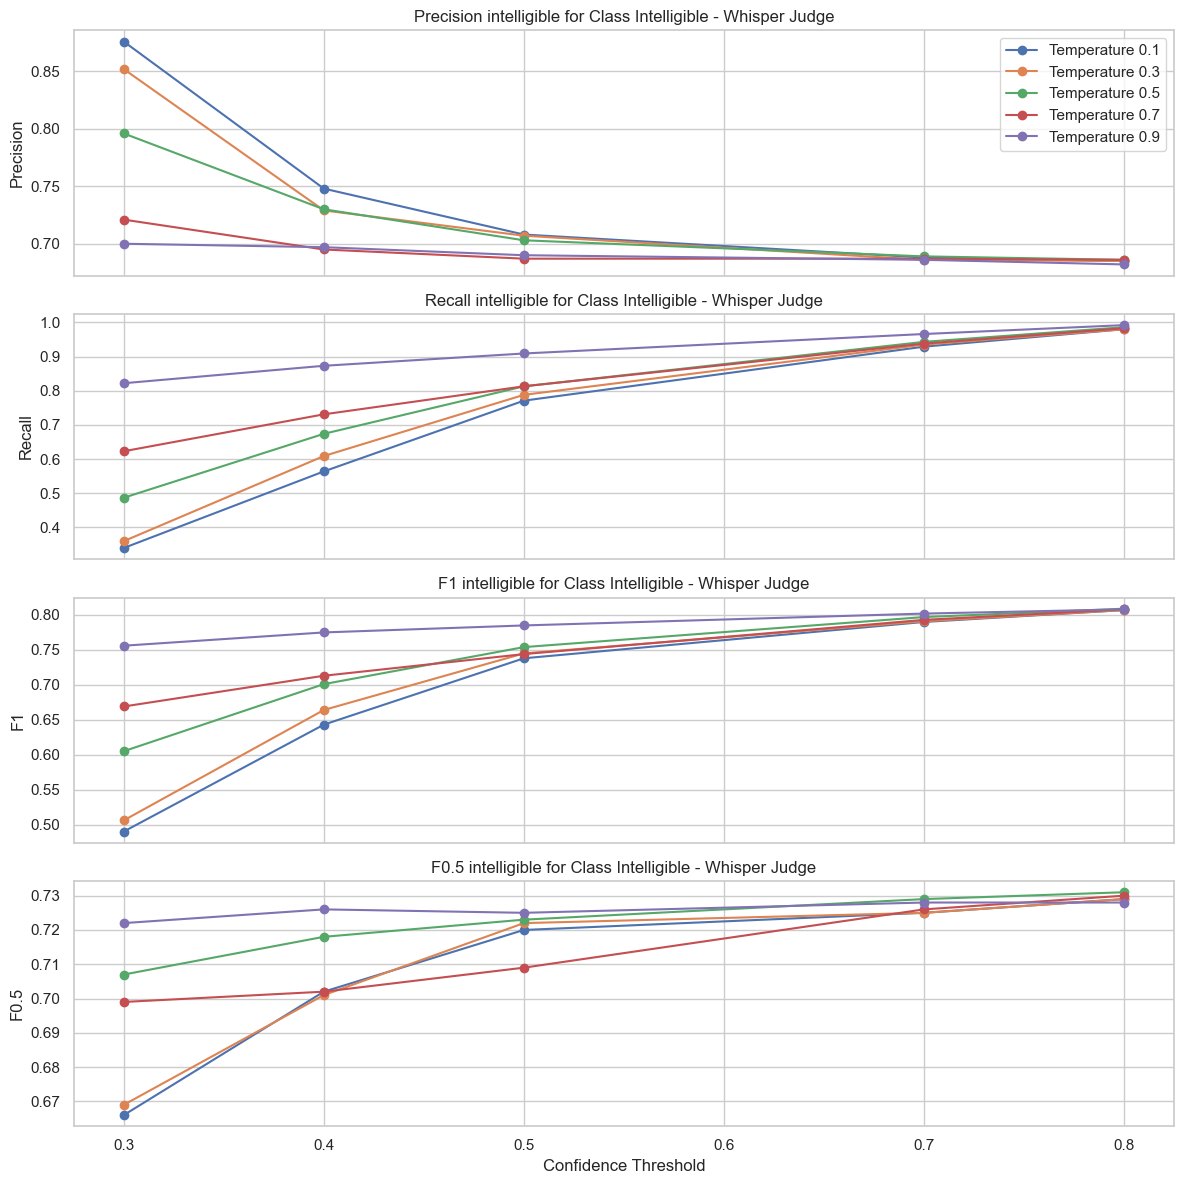

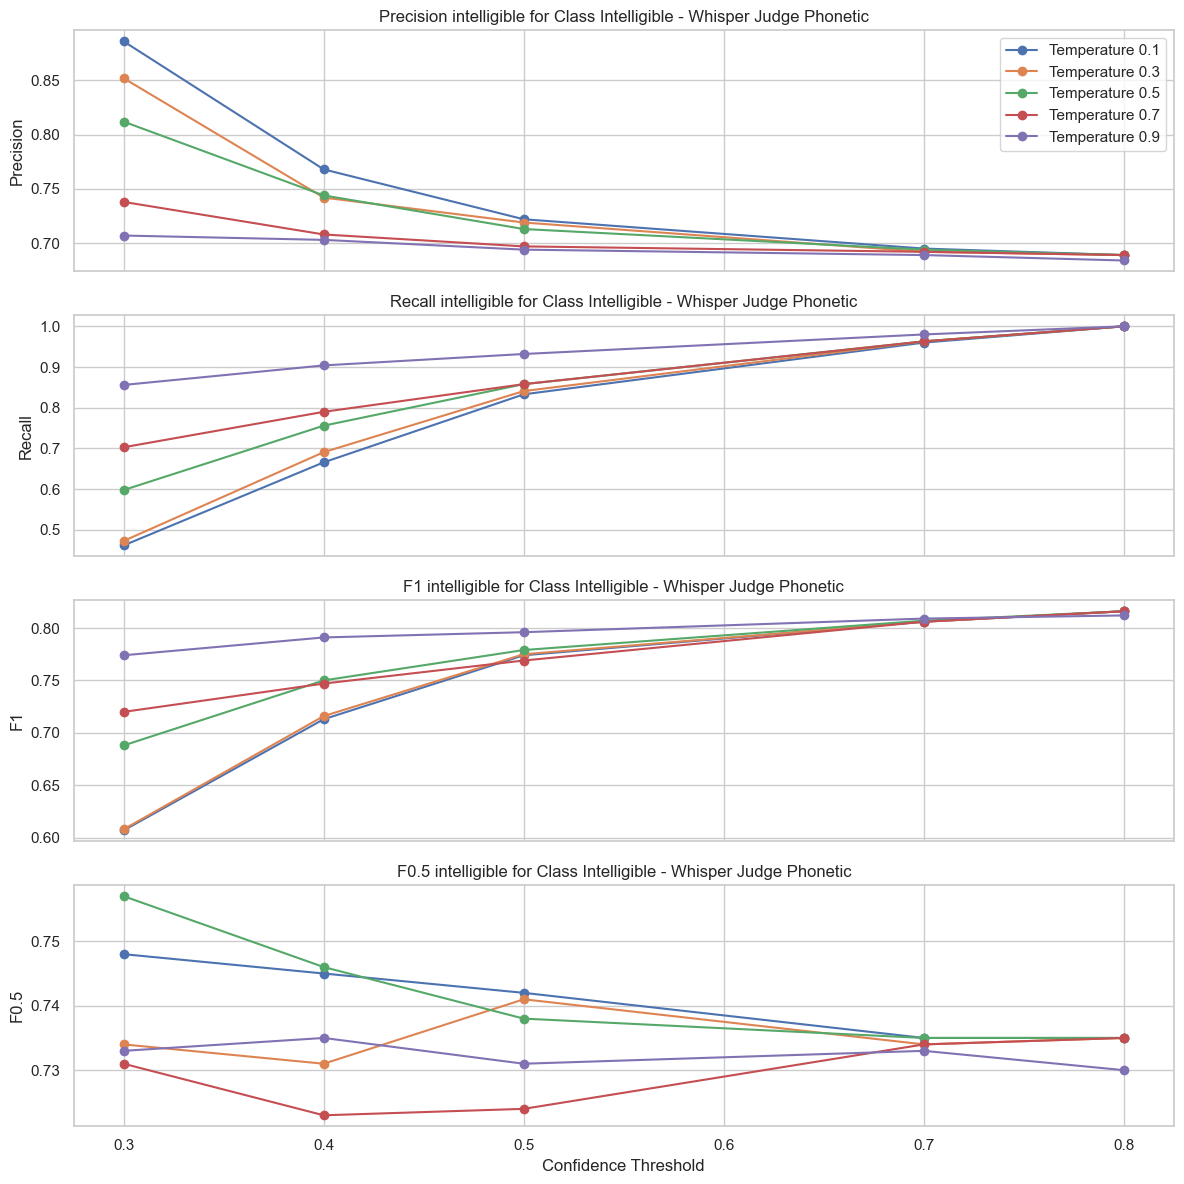

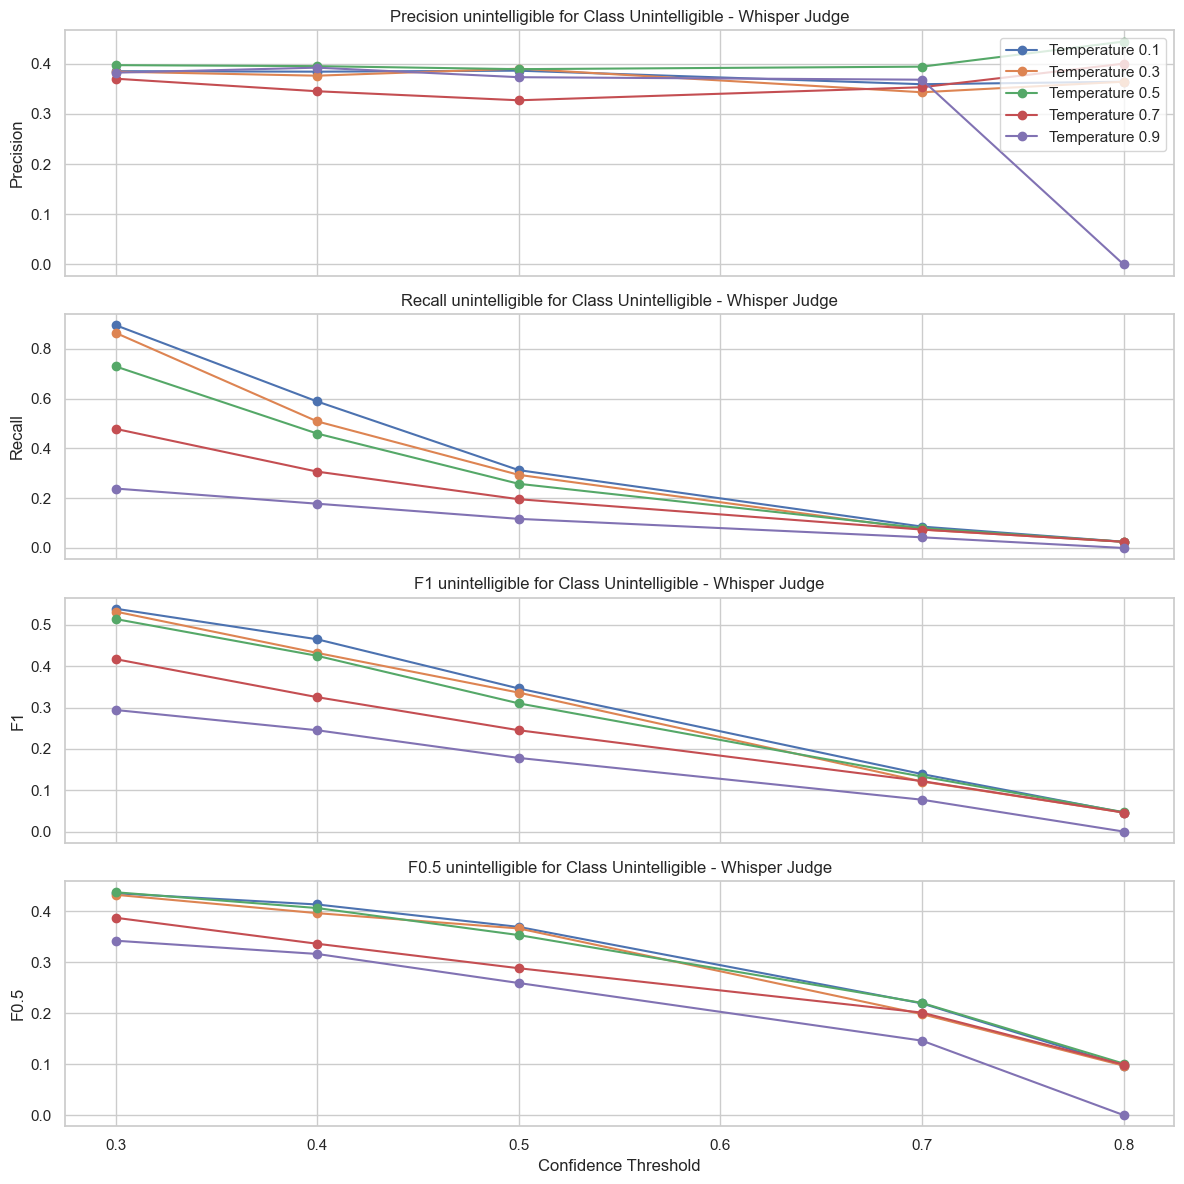

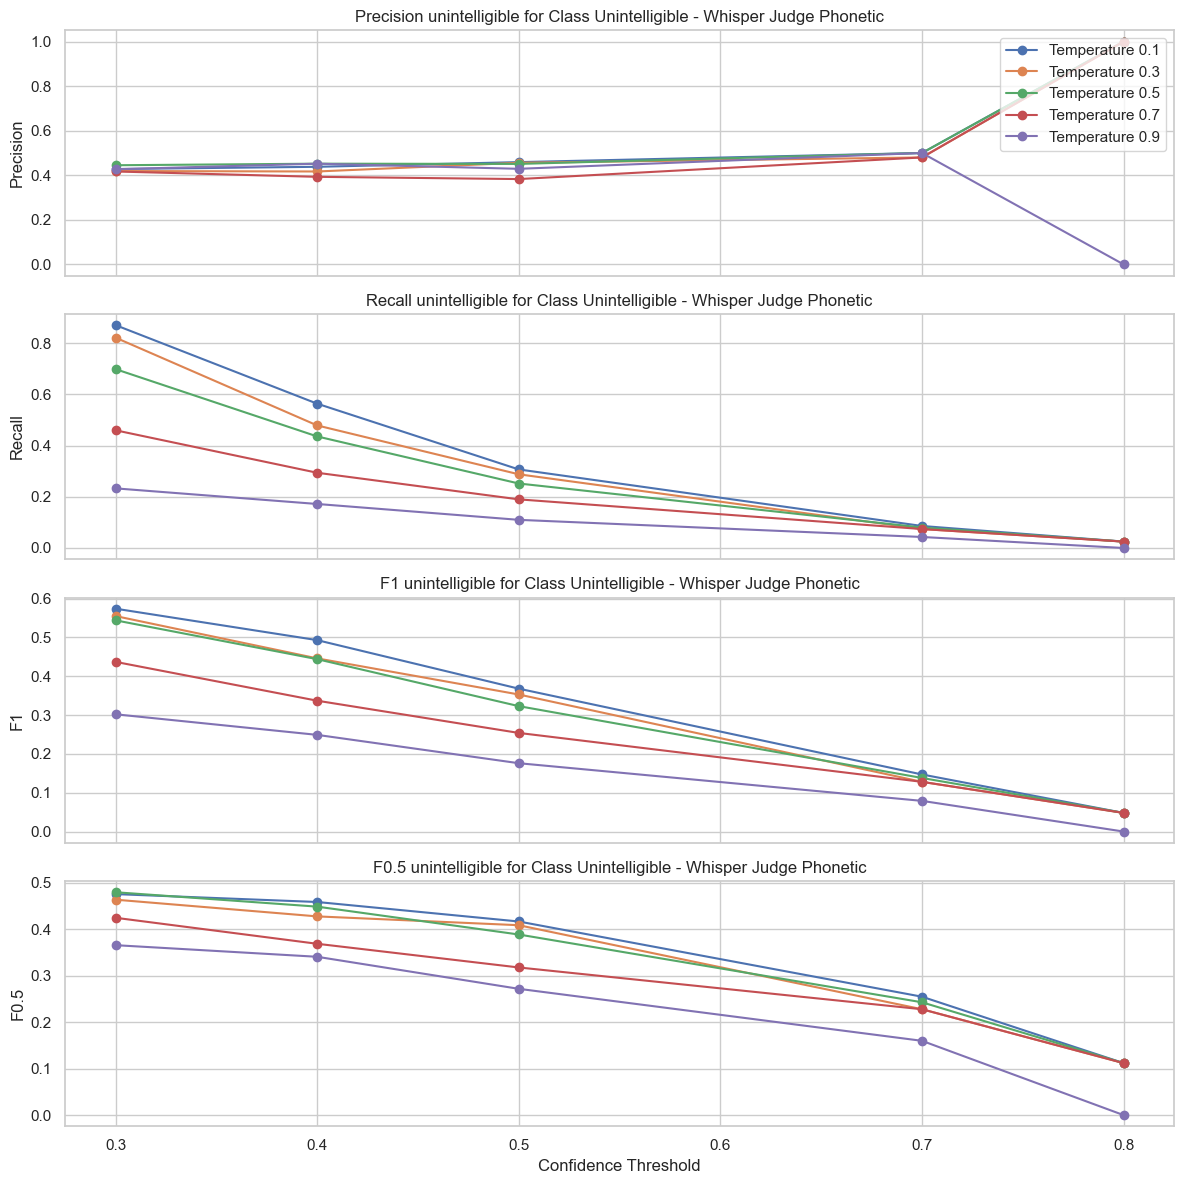

In [38]:
# metrics = [
#     "../json_files/metrics_output/metrics00_cs03.json",
#     "../json_files/metrics_output/metrics00_cs04.json",
#     "../json_files/metrics_output/metrics00_cs05.json",
#     "../json_files/metrics_output/metrics00_cs07.json",
#     "../json_files/metrics_output/metrics00_cs08.json",

#     "../json_files/metrics_output/metrics02_cs03.json",
#     "../json_files/metrics_output/metrics02_cs04.json",
#     "../json_files/metrics_output/metrics02_cs05.json",
#     "../json_files/metrics_output/metrics02_cs07.json",
#     "../json_files/metrics_output/metrics02_cs08.json",  

#     "../json_files/metrics_output/metrics04_cs03.json",
#     "../json_files/metrics_output/metrics04_cs04.json",
#     "../json_files/metrics_output/metrics04_cs05.json",
#     "../json_files/metrics_output/metrics04_cs07.json",
#     "../json_files/metrics_output/metrics04_cs08.json",   

#     "../json_files/metrics_output/metrics06_cs03.json",
#     "../json_files/metrics_output/metrics06_cs04.json",
#     "../json_files/metrics_output/metrics06_cs05.json",
#     "../json_files/metrics_output/metrics06_cs07.json",
#     "../json_files/metrics_output/metrics06_cs08.json",

#     "../json_files/metrics_output/metrics08_cs03.json",
#     "../json_files/metrics_output/metrics08_cs04.json",
#     "../json_files/metrics_output/metrics08_cs05.json",
#     "../json_files/metrics_output/metrics08_cs07.json",
#     "../json_files/metrics_output/metrics08_cs08.json",

#     "../json_files/metrics_output/metrics10_cs03.json",
#     "../json_files/metrics_output/metrics10_cs04.json",
#     "../json_files/metrics_output/metrics10_cs05.json",
#     "../json_files/metrics_output/metrics10_cs07.json",
#     "../json_files/metrics_output/metrics10_cs08.json"
# ]


metrics = [
    "../json_files/metrics_output/metrics01_cs03.json",
    "../json_files/metrics_output/metrics03_cs03.json",
    "../json_files/metrics_output/metrics05_cs03.json",
    "../json_files/metrics_output/metrics07_cs03.json",
    "../json_files/metrics_output/metrics09_cs03.json",

    "../json_files/metrics_output/metrics01_cs04.json",
    "../json_files/metrics_output/metrics03_cs04.json",
    "../json_files/metrics_output/metrics05_cs04.json",
    "../json_files/metrics_output/metrics07_cs04.json",
    "../json_files/metrics_output/metrics09_cs04.json",

    "../json_files/metrics_output/metrics01_cs05.json",
    "../json_files/metrics_output/metrics03_cs05.json",
    "../json_files/metrics_output/metrics05_cs05.json",
    "../json_files/metrics_output/metrics07_cs05.json",
    "../json_files/metrics_output/metrics09_cs05.json",

    "../json_files/metrics_output/metrics01_cs07.json",
    "../json_files/metrics_output/metrics03_cs07.json",
    "../json_files/metrics_output/metrics05_cs07.json",
    "../json_files/metrics_output/metrics07_cs07.json",
    "../json_files/metrics_output/metrics09_cs07.json",

    "../json_files/metrics_output/metrics01_cs08.json",
    "../json_files/metrics_output/metrics03_cs08.json",
    "../json_files/metrics_output/metrics05_cs08.json",
    "../json_files/metrics_output/metrics07_cs08.json",
    "../json_files/metrics_output/metrics09_cs08.json"]


metrics_data = load_metrics(metrics)

# Plot metrics for "class intelligible" and "whisper_judge"
plot_metrics(metrics_data, "class intelligible", "whisper_judge", ["precision_intelligible", "recall_intelligible", "f1_intelligible", "f0.5_intelligible"], "for Class Intelligible - Whisper Judge")

# Plot metrics for "class intelligible" and "whisper_judge_phonetic"
plot_metrics(metrics_data, "class intelligible", "whisper_judge_phonetic", ["precision_intelligible", "recall_intelligible", "f1_intelligible", "f0.5_intelligible"], "for Class Intelligible - Whisper Judge Phonetic")

# Plot metrics for "class unintelligible" and "whisper_judge"
plot_metrics(metrics_data, "class unintelligible", "whisper_judge", ["precision_unintelligible", "recall_unintelligible", "f1_unintelligible", "f0.5_unintelligible"], "for Class Unintelligible - Whisper Judge")

# Plot metrics for "class unintelligible" and "whisper_judge_phonetic"
plot_metrics(metrics_data, "class unintelligible", "whisper_judge_phonetic", ["precision_unintelligible", "recall_unintelligible", "f1_unintelligible", "f0.5_unintelligible"], "for Class Unintelligible - Whisper Judge Phonetic")


## NO numbers shown

In [48]:
def load_metrics(file_paths):
    metrics_data = {}
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)
            filename = os.path.basename(file_path)
            match = re.match(r'metrics(\d+)_cs(\d+)\.json', filename)
            if match:
                temp = int(match.group(1)) / 10  # Assuming temperature is a multiple of 0.1
                cs = int(match.group(2)) / 10  # Assuming confidence score is a multiple of 0.1
                metrics_data[(temp, cs)] = data
    return metrics_data

def plot_combined_metrics(metrics_data, class_key, metric_keys, title_suffix, save_path):
    temperature_values = sorted(set(temp for temp, _ in metrics_data.keys()))
    confidence_thresholds = sorted(set(cs for _, cs in metrics_data.keys()))
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()
    
    styles = {
        "whisper_judge": {"linestyle": "-", "marker": "o"},
        "whisper_judge_phonetic": {"linestyle": "--", "marker": "x"}
    }
    
    for i, metric_key in enumerate(metric_keys):
        ax = axes[i]
        for sub_key, style in styles.items():
            for temp in temperature_values:
                y_values = [metrics_data[(temp, cs)][class_key][sub_key][metric_key] for cs in confidence_thresholds]
                ax.plot(confidence_thresholds, y_values, label=f'{sub_key} (T={temp})', **style)
        
        # ax.set_title(f'{metric_key.replace("_", " ").capitalize()} {title_suffix}', fontsize=12)
        # Split the metric_key and use the first part before the underscore
        ax.set_title(f'{metric_key.split("_")[0].capitalize()} {title_suffix}', fontsize=12)
        

        ax.set_xlabel('Confidence Threshold', fontsize=10)
        ax.set_ylabel('Metric Value', fontsize=10)
        ax.legend(loc='best', fontsize=9)
        ax.grid(True)
    
    fig.suptitle(f'Comparison of Metrics Results for Class "{class_key.split(" ")[1].capitalize()}" Across Different Temperatures and Confidence Thresholds', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save the figure
    plt.savefig(save_path)
    plt.show()


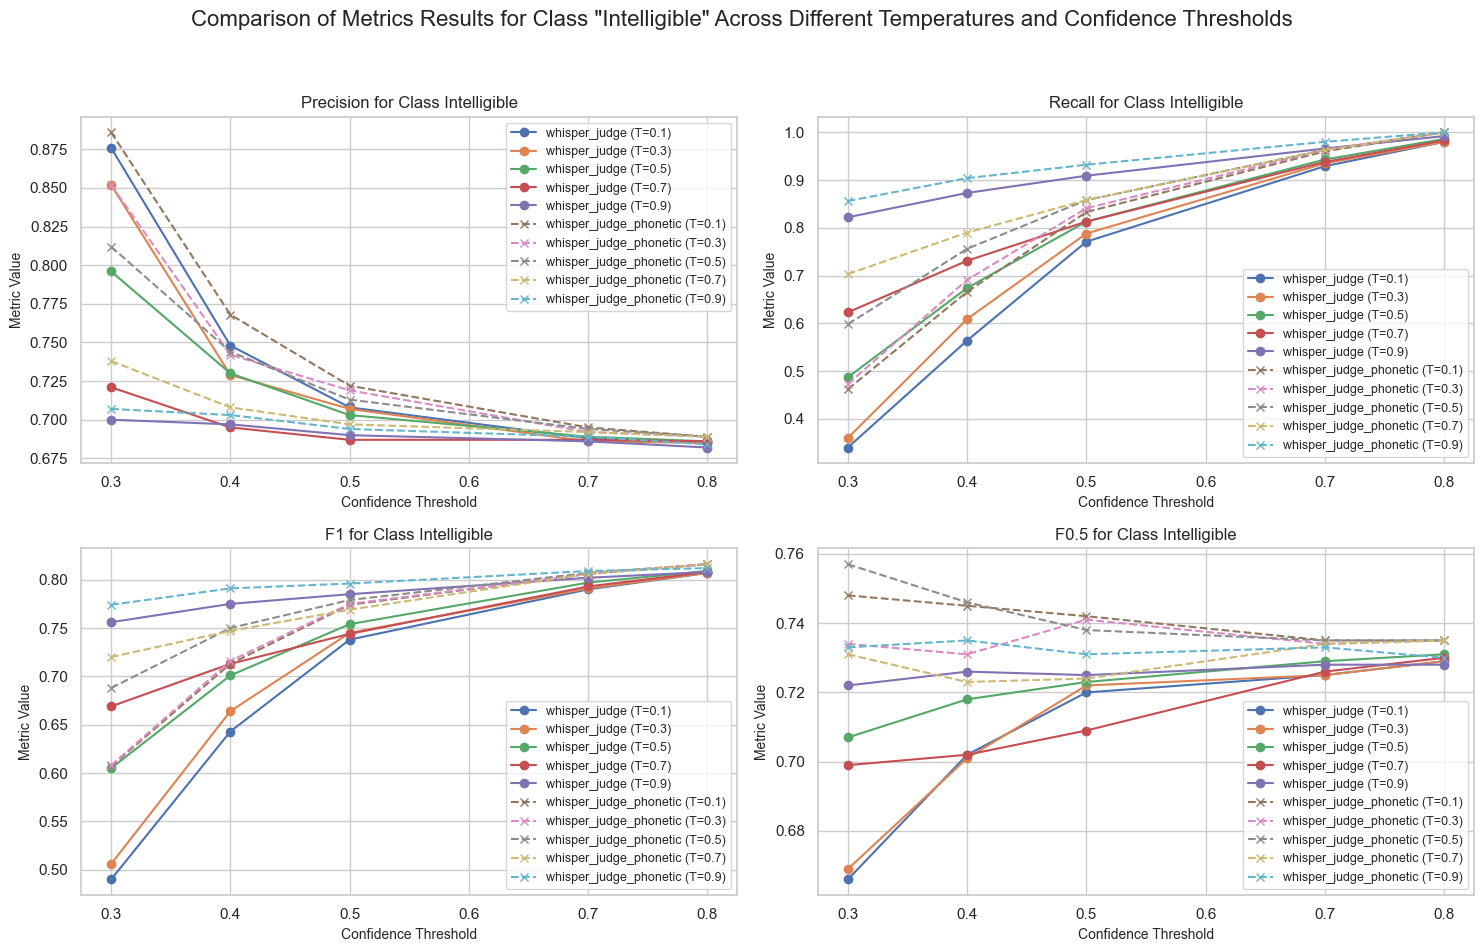

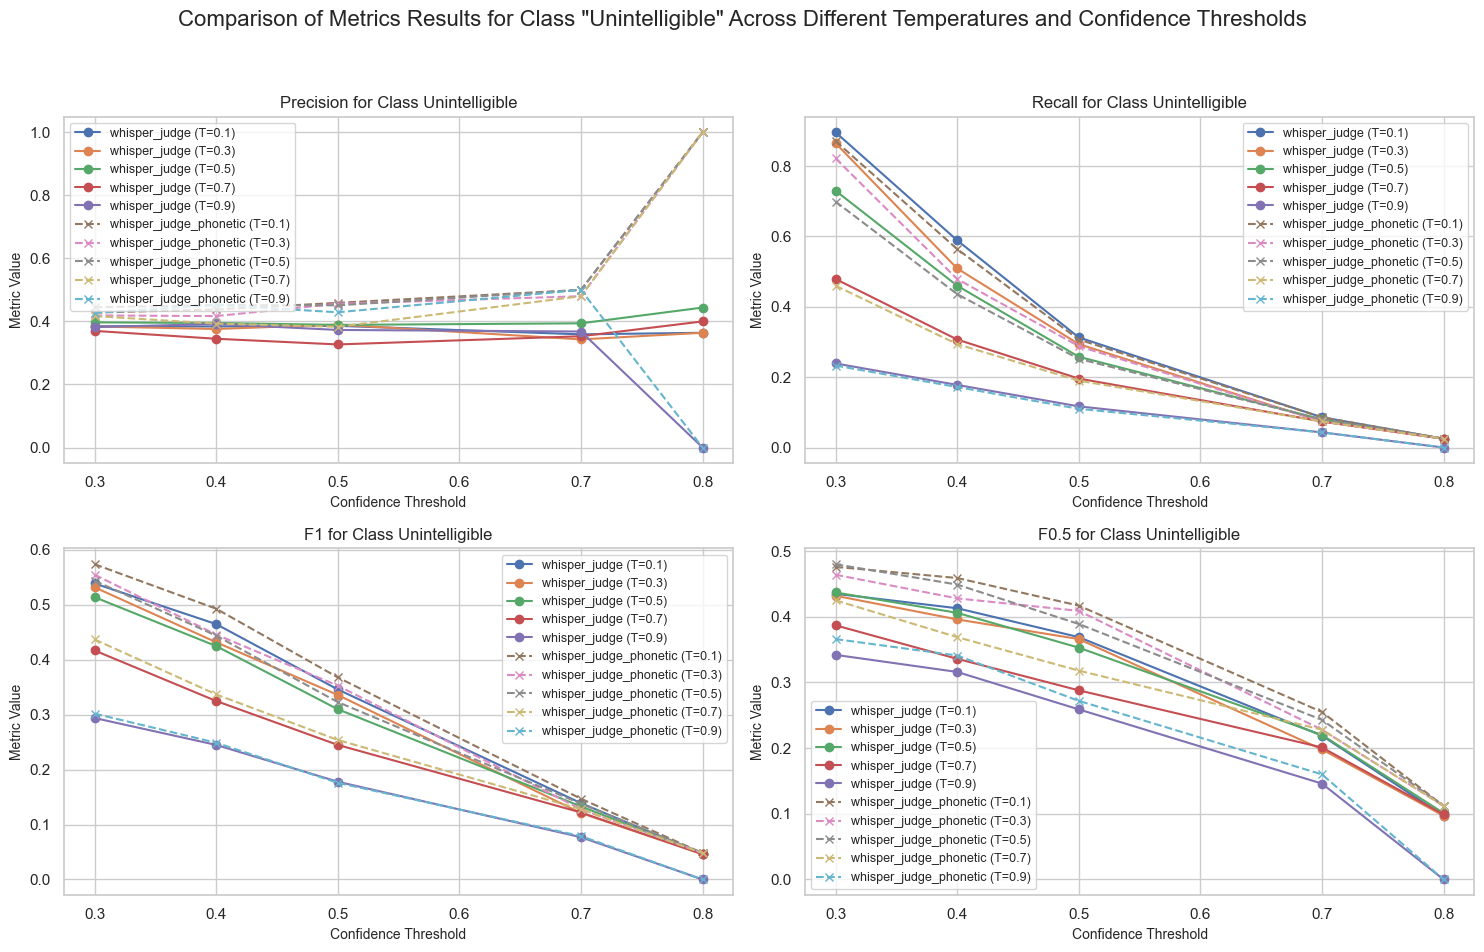

In [50]:
# metrics_data = load_metrics(metrics)

# Plot combined metrics for "class intelligible" and save the figure
plot_combined_metrics(metrics_data, "class intelligible", ["precision_intelligible", "recall_intelligible", "f1_intelligible", "f0.5_intelligible"], "for Class Intelligible", "../graph/Intelligible_Results_Across_Different_Temperatures_and_Confidence_Thresholds.png")

# Plot combined metrics for "class unintelligible" and save the figure
plot_combined_metrics(metrics_data, "class unintelligible", ["precision_unintelligible", "recall_unintelligible", "f1_unintelligible", "f0.5_unintelligible"], "for Class Unintelligible", "../graph/Unintelligible_Results_Across_Different_Temperatures_and_Confidence_Thresholds.png")

## numbers are shown (but overlapped)

In [43]:
# def load_metrics(file_paths):
#     metrics_data = {}
#     for file_path in file_paths:
#         with open(file_path, 'r') as file:
#             data = json.load(file)
#             filename = os.path.basename(file_path)
#             match = re.match(r'metrics(\d+)_cs(\d+)\.json', filename)
#             if match:
#                 temp = int(match.group(1)) / 10  # Assuming temperature is a multiple of 0.1
#                 cs = int(match.group(2)) / 10  # Assuming confidence score is a multiple of 0.1
#                 metrics_data[(temp, cs)] = data
#     return metrics_data

# def plot_combined_metrics(metrics_data, class_key, metric_keys, title_suffix, save_path):
#     temperature_values = sorted(set(temp for temp, _ in metrics_data.keys()))
#     confidence_thresholds = sorted(set(cs for _, cs in metrics_data.keys()))
    
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
#     axes = axes.flatten()
    
#     styles = {
#         "whisper_judge": {"linestyle": "-", "marker": "o"},
#         "whisper_judge_phonetic": {"linestyle": "--", "marker": "x"}
#     }
    
#     for i, metric_key in enumerate(metric_keys):
#         ax = axes[i]
#         for sub_key, style in styles.items():
#             for temp in temperature_values:
#                 y_values = [metrics_data[(temp, cs)][class_key][sub_key][metric_key] for cs in confidence_thresholds]
#                 ax.plot(confidence_thresholds, y_values, label=f'{sub_key} (T={temp})', **style)
                
#                 # Annotate the highest value
#                 max_value = max(y_values)
#                 max_index = y_values.index(max_value)
#                 max_cs = confidence_thresholds[max_index]
#                 ax.annotate(f'{max_value:.3f}', xy=(max_cs, max_value), xytext=(max_cs, max_value + 0.02),
#                             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

                
#                 # # Adjust annotation position
#                 # annotation_y = max_value + 0.02  # Offset from the data point
#                 # annotation_x = max_cs           
#                 # ax.annotate(f'{max_value:.3f}', xy=(max_cs, max_value), xytext=(annotation_x, annotation_y),
#                 #             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)        

        
        
#         # Split the metric_key and use the first part before the underscore
#         ax.set_title(f'{metric_key.split("_")[0].capitalize()} {title_suffix}', fontsize=12)
        
#         ax.set_xlabel('Confidence Threshold', fontsize=10)
#         ax.set_ylabel('Metric Value', fontsize=10)
#         ax.legend(loc='best', fontsize=9)
#         ax.grid(True)
    
#     fig.suptitle(f'Comparison of Metrics for Class "{class_key.split(" ")[1].capitalize()}" Across Different Temperatures and Confidence Thresholds', fontsize=16)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
#     # Save the figure
#     plt.savefig(save_path)
#     plt.show()

# # metrics_data = load_metrics(metrics)

# # Plot combined metrics for "class intelligible" and save the figure
# plot_combined_metrics(metrics_data, "class intelligible", ["precision_intelligible", "recall_intelligible", "f1_intelligible", "f0.5_intelligible"], "for Class Intelligible", "class_intelligible_metrics_num.png")

# # Plot combined metrics for "class unintelligible" and save the figure
# plot_combined_metrics(metrics_data, "class unintelligible", ["precision_unintelligible", "recall_unintelligible", "f1_unintelligible", "f0.5_unintelligible"], "for Class Unintelligible", "class_unintelligible_metrics_num.png")


## Only annotate one highest value per line

In [51]:
def plot_combined_metrics_one_highest_value(metrics_data, class_key, metric_keys, title_suffix, save_path):
    temperature_values = sorted(set(temp for temp, _ in metrics_data.keys()))
    confidence_thresholds = sorted(set(cs for _, cs in metrics_data.keys()))
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()
    
    styles = {
        "whisper_judge": {"linestyle": "-", "marker": "o"},
        "whisper_judge_phonetic": {"linestyle": "--", "marker": "x"}
    }
    
    for i, metric_key in enumerate(metric_keys):
        ax = axes[i]
        subplot_max_value = None
        subplot_max_coord = None
        
        for sub_key, style in styles.items():
            for temp in temperature_values:
                y_values = [metrics_data[(temp, cs)][class_key][sub_key][metric_key] for cs in confidence_thresholds]
                ax.plot(confidence_thresholds, y_values, label=f'{sub_key} (T={temp})', **style)
                
                # Find the maximum value and its index in this line
                max_value = max(y_values)
                max_index = y_values.index(max_value)
                max_cs = confidence_thresholds[max_index]
                
                # Update the subplot max value and coordinates if this one is higher
                if subplot_max_value is None or max_value > subplot_max_value:
                    subplot_max_value = max_value
                    subplot_max_coord = (max_cs, max_value)
        
        # Annotate the highest value in this subplot
        if subplot_max_value is not None and subplot_max_coord is not None:
            max_cs, max_value = subplot_max_coord
            ax.annotate(f'{max_value:.3f}', xy=(max_cs, max_value), xytext=(max_cs, max_value + 0.02),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
        
        # Set the title of the subplot
        ax.set_title(f'{metric_key.split("_")[0].capitalize()} {title_suffix}', fontsize=12)
        
        ax.set_xlabel('Confidence Threshold', fontsize=10)
        ax.set_ylabel('Metric Value', fontsize=10)
        ax.legend(loc='best', fontsize=9)
        ax.grid(True)
    
    fig.suptitle(f'Comparison of Metrics Results for Class "{class_key.split(" ")[1].capitalize()}" Across Different Temperatures and Confidence Thresholds', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save the figure
    plt.savefig(save_path)
    plt.show()


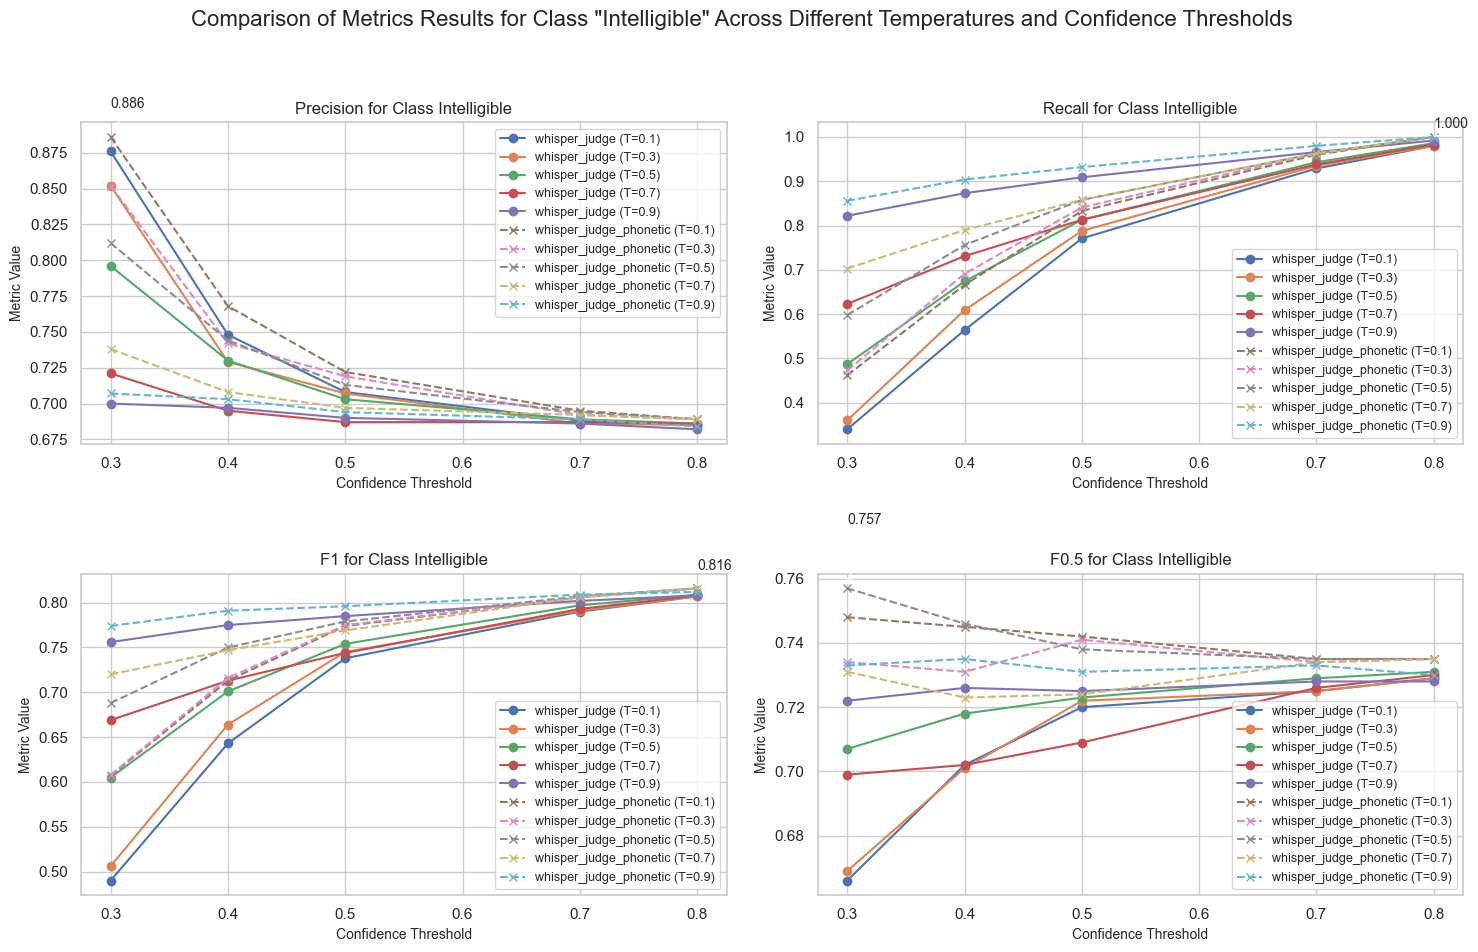

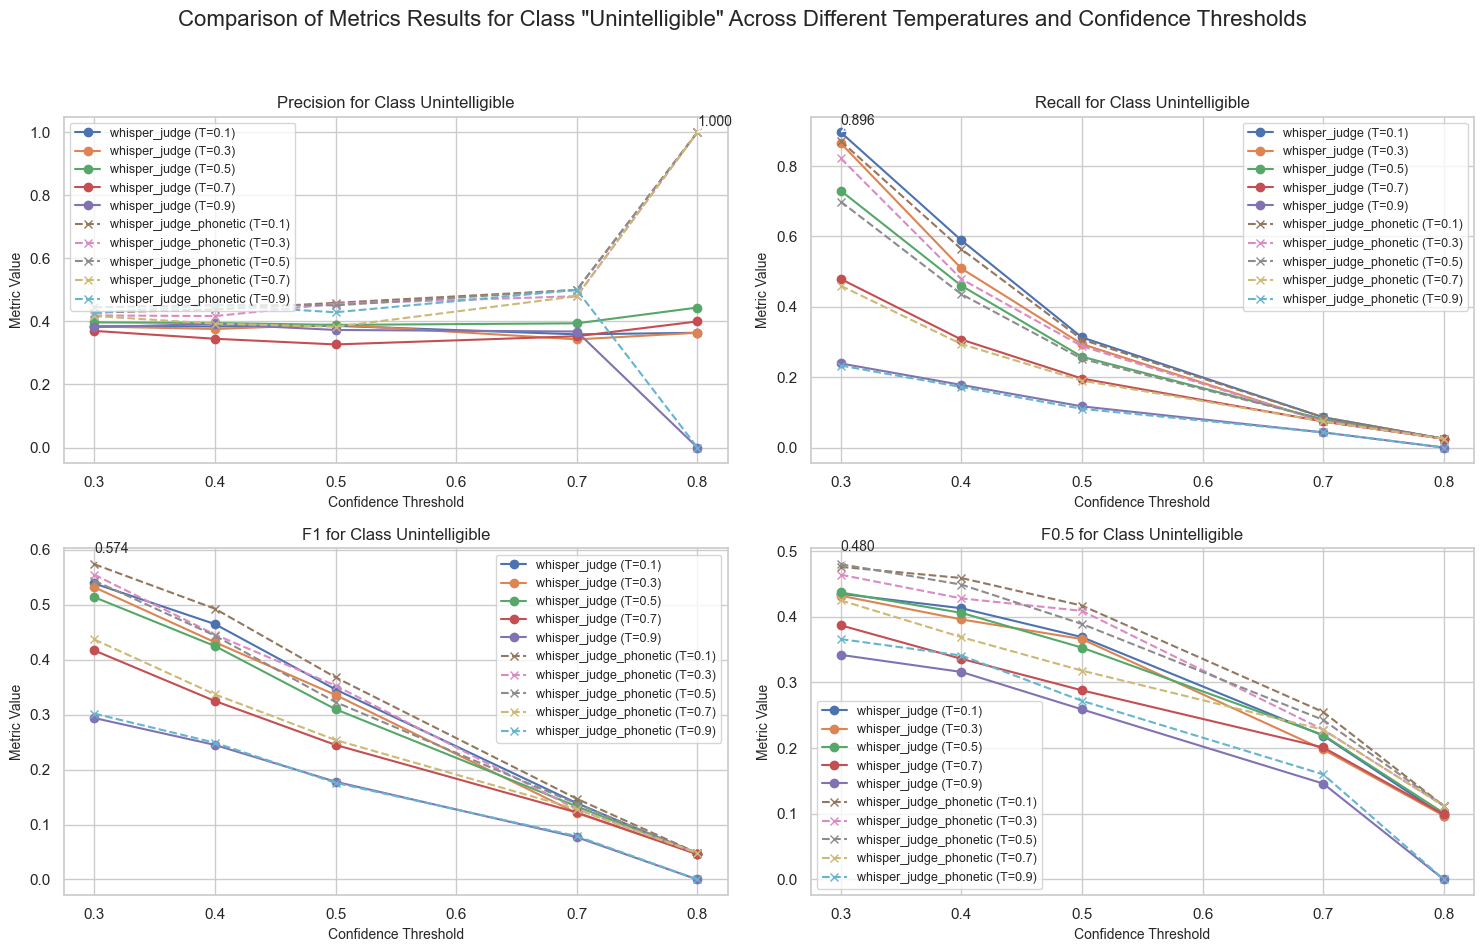

In [52]:
# Plot combined metrics for "class intelligible" and save the figure
plot_combined_metrics_one_highest_value(metrics_data, "class intelligible", ["precision_intelligible", "recall_intelligible", "f1_intelligible", "f0.5_intelligible"], "for Class Intelligible", "../graph/Intelligible_Results_Across_Different_Temperatures_and_Confidence_Thresholds_with_value.png")

# Plot combined metrics for "class unintelligible" and save the figure
plot_combined_metrics_one_highest_value(metrics_data, "class unintelligible", ["precision_unintelligible", "recall_unintelligible", "f1_unintelligible", "f0.5_unintelligible"], "for Class Unintelligible", "../graph/Unintelligible_Results_Across_Different_Temperatures_and_Confidence_Thresholds_with_value.png")


# Run the Best-performing Model on Test Set

**optimal temperature value**: 0.5

In [6]:
# Define the base directory that contains all test data (segmented word-level mp3 files)
test_base_dir = "../data_audio/processed/word_level_mp3/test_all"

In [4]:
optimal_temperature_for_test = 0.5

test_info_path = "../json_files/test/transcription_output/test_raw_info_05.json"
test_raw_text_path = "../json_files/test/transcription_output/test_raw_text_05.json"

In [7]:
# Call the function transcribe_audio_folder to run whisper's model on the test data, with an optimal temperature value 0.5
transcribe_audio_folder(test_base_dir, optimal_temperature_for_test, test_info_path, test_raw_text_path)

C:\Users\Furong\miniconda3\envs\whisper\lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription info saved to ../json_files/test/transcription_output/test_raw_info_05.json
Raw transcription saved to ../json_files/test/transcription_output/test_raw_text_05.json


### Post-process `'text'` and `'avg_logprob'`, get predicted labels (Whisper's judge), and save to json file

In [11]:
test_info_path = ["../json_files/test/transcription_output/test_raw_info_05.json"]
processed_test_output_path = ["../json_files/test/transcription_output/processed_test_output.json"]

In [12]:
# Call function main_output_batch_preprocess to process the raw transcription and get the output json file
main_output_batch_preprocess(test_info_path, processed_test_output_path)

No transcriptions for audio file: s27_paw
No transcriptions for audio file: s29_pot
No transcriptions for audio file: s29_putt
No transcriptions for audio file: s29_put
No transcriptions for audio file: s37_pit
No transcriptions for audio file: s43_meat
No transcriptions for audio file: s43_pit
No transcriptions for audio file: s43_putt
No transcriptions for audio file: s50_boot
Preprocessed results saved to ../json_files/test/transcription_output/processed_test_output.json


### Count the number and percentage of "N/A"s(cmudict do not have the phonetic representations for some words) 

In [15]:
test_NAs_info = "../json_files/test/test_NAs_info.json"
batch_count_na(processed_test_output_path, test_NAs_info)

### Evaluation Metrics **with optimal confidence threshold**: 0.3

In [21]:
optimal_confidence = 0.3

test_metrics_output = ["../json_files/test/test_metrics_output.json"]
test_cm_output = ["../confusion_matrix/test_set_cm"]

In [22]:
main_metrics_with_threshold(processed_test_output_path, test_metrics_output, test_cm_output, optimal_confidence)

Evaluation metrics for whisper_judge (text-based):
precision_intelligible: 0.704
recall_intelligible: 0.477
f1_intelligible: 0.569
f0.5_intelligible: 0.643
precision_unintelligible: 0.364
recall_unintelligible: 0.599
f1_unintelligible: 0.453
f0.5_unintelligible: 0.395
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted Intelligible
Actual Unintelligible        422             283            
Actual Intelligible          737             673            
-------------------------------------------------------------
Evaluation metrics for whisper_judge_phonetic (phonetic representation-based):
precision_intelligible: 0.732
recall_intelligible: 0.565
f1_intelligible: 0.638
f0.5_intelligible: 0.691
precision_unintelligible: 0.403
recall_unintelligible: 0.586
f1_unintelligible: 0.477
f0.5_unintelligible: 0.429
----------------------------------------------
Confusion Matrix:
               Predicted Unintelligible     Predicted

## Error Analysis--extracting FP and FN

In [1]:
import json

In [3]:
# Function to extract labels and apply confidence threshold
def extract_labels_for_test_set(data, confidence_threshold):
    true_labels = []
    whisper_judges_phonetic = []
    keys = []

    for key, value in data.items():
        true_labels.append(value["trueLabel"])
        keys.append(key)

        if value["confidence_score"] >= confidence_threshold:
            whisper_judges_phonetic.append(value["whisper_judge_phonetic"])
        else:
            whisper_judges_phonetic.append("intelligible")

    true_labels = [1 if label == "intelligible" else 0 for label in true_labels]
    whisper_judges_phonetic = [1 if judge == "intelligible" else 0 for judge in whisper_judges_phonetic]

    return keys, true_labels, whisper_judges_phonetic

# Function to extract false positives and false negatives
def extract_false_positives_and_negatives(data, keys, true_labels, predicted_labels):
    false_positives = []
    false_negatives = []

    for key, true_label, predicted_label in zip(keys, true_labels, predicted_labels):
        if predicted_label == 0 and true_label == 1:  # False Positive
            false_positives.append(data[key])
        elif predicted_label == 1 and true_label == 0:  # False Negative
            false_negatives.append(data[key])

    return false_positives, false_negatives

# Function to save false positives and negatives to a JSON file
def save_false_positives_and_negatives(fp_fn_data, output_path):
    with open(output_path, 'w') as file:
        json.dump(fp_fn_data, file, indent=4)
    print(f"False Positives and False Negatives for the unintelligible class saved to {output_path}")

# Load the preprocessed JSON data
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Main function to handle the process
def main_extract_fp_fn(preprocessed_json_file_path, confidence_threshold, fp_fn_output_path):
    data = load_json(preprocessed_json_file_path)

    # Extract labels and apply confidence threshold
    keys, true_labels, whisper_judges_phonetic = extract_labels_for_test_set(data, confidence_threshold)

    # Extract false positives and false negatives for phonetic-based labels
    false_positives_phonetic, false_negatives_phonetic = extract_false_positives_and_negatives(data, keys, true_labels, whisper_judges_phonetic)

    # Prepare the data to be saved in JSON format
    fp_fn_data = {
        "False Positives": false_positives_phonetic,
        "False Negatives": false_negatives_phonetic
    }

    # Save the false positives and negatives to a JSON file
    save_false_positives_and_negatives(fp_fn_data, fp_fn_output_path)

# Define file paths and parameters
processed_test_output_path = "../json_files/test/transcription_output/processed_test_output.json"
confidence_threshold = 0.3
fp_fn_output_path = "../json_files/test/false_positives_negatives.json"

# Run the main function
main_extract_fp_fn(processed_test_output_path, confidence_threshold, fp_fn_output_path)


False Positives and False Negatives for the unintelligible class saved to ../json_files/test/false_positives_negatives.json


### Count misclassified word frequencies

In [6]:
from collections import Counter, OrderedDict

# Function to count the frequency of misclassified words separately for FP and FN
def count_misclassified_words(fp_fn_data):
    fp_counter = Counter()
    fn_counter = Counter()
    # Count the words in False Positives
    for item in fp_fn_data["False Positives"]:
        fp_counter[item["true_transcription"]] += 1
    # Count the words in False Negatives
    for item in fp_fn_data["False Negatives"]:
        fn_counter[item["true_transcription"]] += 1
    # Combine the counts for total misclassifications
    total_counter = fp_counter + fn_counter
    return fp_counter, fn_counter, total_counter
    

# Function to save the word frequencies to a JSON file, sorted by total frequency
def save_word_frequencies(fp_counter, fn_counter, total_counter, output_path):
    # Combine counters into a single dictionary
    word_freqs = {}
    for word in total_counter:
        word_freqs[word] = {
            "False Positives": fp_counter[word],
            "False Negatives": fn_counter[word],
            "Total": total_counter[word]
        }
    # Sort the dictionary by total misclassifications in descending order
    sorted_word_freqs = OrderedDict(sorted(word_freqs.items(), key=lambda item: item[1]["Total"], reverse=True))
    with open(output_path, 'w') as file:
        json.dump(sorted_word_freqs, file, indent=4)
    print(f"Misclassified word frequencies saved to {output_path}")


# Main function to load data, count word frequencies, and save them
def main_count_misclassified_words(fp_fn_file_path, word_freq_output_path):
    # Load the false positives and negatives data
    fp_fn_data = load_json(fp_fn_file_path)

    # Count the frequency of misclassified words separately for FP and FN
    fp_counter, fn_counter, total_counter = count_misclassified_words(fp_fn_data)

    # Save the word frequencies to a JSON file, sorted by total misclassifications
    save_word_frequencies(fp_counter, fn_counter, total_counter, word_freq_output_path)

    # Print the word frequencies
    print("Misclassified Word Frequencies (sorted by Total):")
    for word, freqs in sorted(total_counter.items(), key=lambda item: item[1], reverse=True):
        print(f"{word}: FP={fp_counter[word]}, FN={fn_counter[word]}, Total={freqs}")


# Define file paths
fp_fn_file_path = "../json_files/test/false_positives_negatives.json"
word_freq_output_path = "../json_files/test/misclassified_word_frequencies.json"

# Run the main function
main_count_misclassified_words(fp_fn_file_path, word_freq_output_path)

Misclassified word frequencies saved to ../json_files/test/misclassified_word_frequencies.json
Misclassified Word Frequencies (sorted by Total):
bout: FP=17, FN=12, Total=29
doll: FP=25, FN=1, Total=26
pot: FP=23, FN=2, Total=25
fur: FP=11, FN=14, Total=25
half: FP=24, FN=0, Total=24
paw: FP=13, FN=10, Total=23
pool: FP=18, FN=5, Total=23
pull: FP=6, FN=17, Total=23
pole: FP=18, FN=4, Total=22
pore: FP=15, FN=7, Total=22
seedy: FP=20, FN=2, Total=22
fir: FP=13, FN=9, Total=22
fern: FP=12, FN=10, Total=22
bird: FP=11, FN=11, Total=22
tide: FP=14, FN=7, Total=21
tied: FP=13, FN=8, Total=21
bay: FP=18, FN=3, Total=21
daft: FP=18, FN=3, Total=21
pit: FP=9, FN=12, Total=21
cot: FP=18, FN=2, Total=20
caught: FP=10, FN=10, Total=20
putt: FP=9, FN=11, Total=20
pet: FP=11, FN=7, Total=18
boat: FP=16, FN=2, Total=18
pat: FP=13, FN=5, Total=18
bard: FP=13, FN=5, Total=18
pour: FP=13, FN=5, Total=18
pause: FP=10, FN=7, Total=17
dance: FP=17, FN=0, Total=17
board: FP=7, FN=10, Total=17
beer: FP=11,

### Extract transcriptions, along with confidence scores and student IDs from the false positives and false negatives

In [7]:
from collections import defaultdict

In [3]:
# Load the preprocessed JSON data
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [4]:
# from collections import defaultdict

# Function to extract transcriptions, confidence scores, and student IDs from the false positives and false negatives
def extract_transcriptions_confidence_studentID(fp_fn_data):
    false_positives_transcriptions = defaultdict(list)
    false_negatives_transcriptions = defaultdict(list)

    # Extracting the entries for false positives
    for entry in fp_fn_data["False Positives"]:
        word = entry["true_transcription"]
        whisper_transcription = entry["whisper_transcription"]
        confidence_score = entry["confidence_score"]
        student_id = entry["studentID"]
        false_positives_transcriptions[word].append({
            "studentID": student_id,
            "transcription": whisper_transcription,
            "confidence": confidence_score
        })

    # Extracting the entries for false negatives
    for entry in fp_fn_data["False Negatives"]:
        word = entry["true_transcription"]
        whisper_transcription = entry["whisper_transcription"]
        confidence_score = entry["confidence_score"]
        student_id = entry["studentID"]
        false_negatives_transcriptions[word].append({
            "studentID": student_id,
            "transcription": whisper_transcription,
            "confidence": confidence_score
        })

    return false_positives_transcriptions, false_negatives_transcriptions

# Function to save the transcriptions with confidence scores and student IDs to JSON files
def save_transcriptions_to_json(transcriptions, file_path):
    with open(file_path, 'w') as file:
        json.dump(transcriptions, file, indent=4)
    print(f"Json file saved to {file_path}.")


# Main function to load, process, and save the transcriptions with confidence scores and student IDs
def main():
    # Specify the path to your JSON file with false positives and false negatives
    file_path = "../json_files/test/false_positives_negatives.json"
    
    # Load the JSON data
    fp_fn_data = load_json(file_path)
    
    # Extract transcriptions, confidence scores, and student IDs for false positives and false negatives
    false_positives_transcriptions, false_negatives_transcriptions = extract_transcriptions_confidence_studentID(fp_fn_data)
    
    # Save the transcriptions with confidence scores and student IDs to separate JSON files
    save_transcriptions_to_json(false_positives_transcriptions, "../json_files/test/false_positives_transcriptions.json")
    save_transcriptions_to_json(false_negatives_transcriptions, "../json_files/test/false_negatives_transcriptions.json")

if __name__ == "__main__":
    main()


Json file saved to ../json_files/test/false_positives_transcriptions.json.
Json file saved to ../json_files/test/false_negatives_transcriptions.json.


### Extract FN that were actually TP and save to json

In [6]:
# Function to extract true positives that became false negatives due to confidence threshold
def extract_tp_to_fn(fp_fn_data, confidence_threshold):
    true_positives_to_false_negatives = []

    # Iterate over the false negatives to identify cases affected by the confidence threshold
    for entry in fp_fn_data["False Negatives"]:
        if entry["confidence_score"] < confidence_threshold and entry["whisper_judge_phonetic"] == "unintelligible":
            true_positives_to_false_negatives.append(entry)

    return true_positives_to_false_negatives

# Function to save the extracted data to a JSON file
def save_tp_to_fn(tp_to_fn_data, output_path):
    with open(output_path, 'w') as file:
        json.dump(tp_to_fn_data, file, indent=4)
    print(f"True Positives that became False Negatives saved to {output_path}")

# Main function to load, process, and save the true positives that became false negatives
def main_extract_tp_to_fn(fp_fn_file_path, confidence_threshold, tp_to_fn_output_path):
    # Load the JSON data containing false positives and false negatives
    fp_fn_data = load_json(fp_fn_file_path)

    # Extract true positives that became false negatives due to the confidence threshold
    true_positives_to_false_negatives = extract_tp_to_fn(fp_fn_data, confidence_threshold)

    # Save the extracted data to a new JSON file
    save_tp_to_fn(true_positives_to_false_negatives, tp_to_fn_output_path)

# Define file paths and parameters
fp_fn_file_path = "../json_files/test/false_positives_negatives.json"
confidence_threshold = 0.3
tp_to_fn_output_path = "../json_files/test/TP_to_FN.json"

# Run the main function
main_extract_tp_to_fn(fp_fn_file_path, confidence_threshold, tp_to_fn_output_path)

True Positives that became False Negatives saved to ../json_files/test/TP_to_FN.json


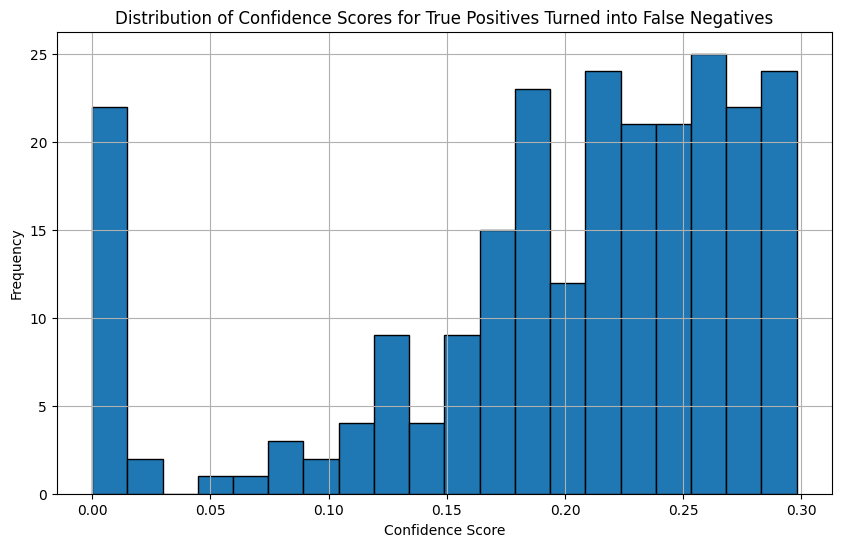

In [13]:
# import matplotlib.pyplot as plt

# Load the JSON file containing the 244 instances
with open("../json_files/test/TP_to_FN.json", 'r') as file:
    data = json.load(file)

# Extract confidence scores
confidence_scores = [entry["confidence_score"] for entry in data]

# Plot the distribution of confidence scores
plt.figure(figsize=(10, 6))
plt.hist(confidence_scores, bins=20, color='#1f77b4', edgecolor='black')
plt.title('Distribution of Confidence Scores for True Positives Turned into False Negatives')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("../graph/Distribution_of_Confidence_Score_for_TP_being_FN.png")
plt.show()


### Extract real FN and save to json

In [14]:
# Function to process and save real false negatives to a JSON file
def extract_and_save_real_false_negatives(fp_fn_file_path, real_fn_output_path):
    # Load the JSON data containing false positives and false negatives
    fp_fn_data = load_json(fp_fn_file_path)
    
    # Initialize list to store real false negatives
    real_false_negatives = []
    
    # Iterate through false negatives and filter out those marked as 'intelligible'
    for entry in fp_fn_data["False Negatives"]:
        if entry["whisper_judge_phonetic"] == "intelligible":
            real_false_negatives.append(entry)
    
    # Save the real false negatives to a separate JSON file
    with open(real_fn_output_path, 'w') as file:
        json.dump(real_false_negatives, file, indent=4)
    
    print(f"Real false negatives saved to {real_fn_output_path}")

# Define file paths and parameters
fp_fn_file_path = "../json_files/test/false_positives_negatives.json"
real_fn_output_path = "../json_files/test/real_false_negatives.json"

# Call the function to process and save real false negatives
extract_and_save_real_false_negatives(fp_fn_file_path, real_fn_output_path)


Real false negatives saved to ../json_files/test/real_false_negatives.json
